This is the analysis of patients admitted to the emergency center of KBC in Osijek. Dependent variables are going to be death and icu (whether the patient died during the observed period and whether the patient was admitted to the intensive care unit during the observed period). All other characteristics and measures will be used as independent variables.

# Load the data

In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset_backup = pd.read_excel("statistika.xlsx", sheet_name="Sheet1")

In [6]:
dataset = dataset_backup.copy()
dataset.head()

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  ...  \
0   1     1       1  1936          6       1     1.0      1.0    0     0  ...   
1   2     2       1  1972         10       1     3.0      4.0    0     0  ...   
2   3     2       1  1946          9       4     5.0      1.0    1     0  ...   
3   4     2       1  1927         11       6     1.0      2.0    0     0  ...   
4   5     2       1  1934         10       3     3.0      1.0    0     0  ...   

   KISIK_BOD_6  TLAK_6  TLAK_BOD_6  PULS_6  PULS_BOD_6  SVIJEST_6  \
0          NaN     NaN         NaN     NaN         NaN        NaN   
1          NaN     NaN         NaN     NaN         NaN        NaN   
2          NaN     NaN         NaN     NaN         NaN        NaN   
3          NaN     NaN         NaN     NaN         NaN        NaN   
4          NaN     NaN         NaN     NaN         NaN        NaN   

   SVIJEST_BOD_6  TEMPERATURA_6  TEMP_BOD_6  UKUPNI_BODOVI_6  
0            NaN            NaN         NaN              NaN  
1            NaN            NaN         NaN              NaN  
2            NaN            NaN         NaN              NaN  
3            NaN            NaN         NaN              NaN  
4            NaN            NaN         NaN              NaN  

[5 rows x 114 columns]

In [7]:
dataset.shape

(278, 114)

In [8]:
dataset.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Columns: 114 entries, RB to UKUPNI_BODOVI_6
dtypes: float64(81), int64(33)
memory usage: 247.7 KB


# Analysis

## Sex of patients

In [10]:
dataset["SPOL"].unique()

array([1, 2])

In [11]:
dataset["sex"] = dataset["SPOL"].apply(str).replace("1", "M")
dataset["sex"] = dataset["sex"].replace("2", "F")

In [12]:
dataset["sex"]

0      M
1      F
2      F
3      F
4      F
      ..
273    M
274    F
275    F
276    F
277    M
Name: sex, Length: 278, dtype: object

In [13]:
freq_table_sex = pd.crosstab(dataset['sex'], 'frequency')
freq_table_sex["rel_frequency"] = freq_table_sex['frequency']/len(dataset["sex"])
freq_table_sex

col_0  frequency  rel_frequency
sex                            
F            152       0.546763
M            126       0.453237

In [14]:
freq_table_sex["frequency"]["M"]

126

In [15]:
from scipy.stats import binom_test

In [16]:
binom_test(x=freq_table_sex["frequency"]["M"], n=len(dataset["sex"]), p=1/2, alternative="two-sided")

/var/folders/pn/n2g0nqvs69b0yx721gj7v9gw0000gn/T/ipykernel_1199/98982768.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=freq_table_sex["frequency"]["M"], n=len(dataset["sex"]), p=1/2, alternative="two-sided")


0.1336244676178877

Let us test hypothesis that the sample comes from population with equal proportion of males and females, on significance level of alpha=0.05. Denote by p the probability that the randomly selected person is male. In that case, we use binomial test with:\
H_0: p=1/2 \
H_1: p!=1/2

Since p-value equals 0.1336244676178877 > alpha, on a significance level of 0.05 we have no reason to reject the nul-hypothesis. Thus, we don't have reason do doubt that the sample comes from binomial distribution with parameter 1/2. 

## Residence of patients

In [17]:
dataset["MJESTO"].unique()

array([1, 2])

In [18]:
dataset["residence"] = dataset["MJESTO"].apply(str).replace("1", "city")
dataset["residence"] = dataset["residence"].replace("2", "village")

In [19]:
freq_table_residence = pd.crosstab(dataset['residence'], 'frequency')
freq_table_residence["rel_frequency"] = freq_table_residence['frequency']/len(dataset["residence"])
freq_table_residence

col_0      frequency  rel_frequency
residence                          
city             171       0.615108
village          107       0.384892

In [20]:
binom_test(x=freq_table_residence["frequency"]["city"], n=len(dataset["residence"]), p=1/2, alternative="two-sided")

/var/folders/pn/n2g0nqvs69b0yx721gj7v9gw0000gn/T/ipykernel_1199/1917261699.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=freq_table_residence["frequency"]["city"], n=len(dataset["residence"]), p=1/2, alternative="two-sided")


0.00014835165729763173

We use binomial test to test the hypothesis that the sample comes from distribution where proportions of those that live in the cities and villages are equal, with significance level 0.05. Since p-value equals 0.00014835165729763173, we reject the nul-hypothesis. We can say that on this significance level, the proportions of patients with residence in cities and those that live in villages are not equal. 

## Age of patients

In [21]:
dataset["DOB"].unique()

array([1936, 1972, 1946, 1927, 1934, 1939, 1996, 1948, 1932, 1953, 1949,
       2003, 1945, 1935, 1955, 1999, 1951, 1944, 1959, 1978, 1941, 1952,
       1971, 1954, 1963, 1937, 1979, 1960, 1940, 1938, 1942, 1957, 1956,
       1970, 1964, 1958, 1950, 1967, 1980, 1976, 1962, 1969, 1987, 1965,
       1966, 1973, 1961, 1975, 1983, 1968, 1933, 2000, 1943, 1995, 1986,
       1947, 2002, 1931, 1977, 1998, 1974, 1929, 2001, 1982, 1993, 1997,
       2006])

In [22]:
import datetime
dataset["age"] = datetime.datetime.today().year - dataset["DOB"]
dataset["age"].unique()

array([88, 52, 78, 97, 90, 85, 28, 76, 92, 71, 75, 21, 79, 89, 69, 25, 73,
       80, 65, 46, 83, 72, 53, 70, 61, 87, 45, 64, 84, 86, 82, 67, 68, 54,
       60, 66, 74, 57, 44, 48, 62, 55, 37, 59, 58, 51, 63, 49, 41, 56, 91,
       24, 81, 29, 38, 77, 22, 93, 47, 26, 50, 95, 23, 42, 31, 27, 18])

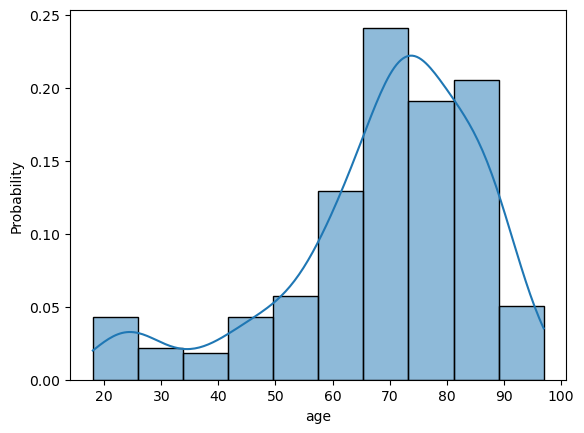

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

age_weights = np.ones_like(dataset["age"])/len(dataset["age"])
#plt.hist(dataset["age"], weights=age_weights)
sns.histplot(dataset["age"], kde=True, stat="probability", bins=10)
plt.show()

## Reason for patient's visit to the hospital

This is a variable that says what which category of disease or sympoms do patients have.

In [24]:
dataset["RAZLOG/dg"].head()

0     6
1    10
2     9
3    11
4    10
Name: RAZLOG/dg, dtype: int64

In [25]:
dataset["RAZLOG/dg"].unique()

array([ 6, 10,  9, 11,  4,  1, 14, 15, 16, 17,  5,  8, 12,  2])

In [26]:
dataset["reason"] = [i if i in [6, 9] else 0 for i in dataset["RAZLOG/dg"]]

In [27]:
dataset["reason"].unique()

array([6, 0, 9])

In [28]:
freq_table_reason = pd.crosstab(dataset['reason'], 'frequency')
freq_table_reason["rel_frequency"] = freq_table_reason['frequency']/len(dataset["reason"])
freq_table_reason

col_0   frequency  rel_frequency
reason                          
0             126       0.453237
6              56       0.201439
9              96       0.345324

## Admission of patients

In [29]:
dataset["OTPUST"].head()

0    1
1    1
2    4
3    6
4    3
Name: OTPUST, dtype: int64

In [30]:
sorted(dataset["OTPUST"].unique())

[1, 2, 3, 4, 5, 6]

In [31]:
str(dataset["OTPUST"][1])

'1'

In [32]:
dataset["OTPUST"].apply(str)

0      1
1      1
2      4
3      6
4      3
      ..
273    1
274    6
275    3
276    3
277    1
Name: OTPUST, Length: 278, dtype: object

In [33]:
dataset["admission"] = dataset["OTPUST"].apply(str).replace("1", "dismissed home")
dataset["admission"] = dataset["admission"].replace("2", "instructed to other department")
dataset["admission"] = dataset["admission"].replace("3", "hospitalised in a dep. with minimal care")
dataset["admission"] = dataset["admission"].replace("4", "admitted to intensive care unit")
dataset["admission"] = dataset["admission"].replace("5", "death")
dataset["admission"] = dataset["admission"].replace("6", "refused hospitalisation")
dataset["admission"].describe()

count                278
unique                 6
top       dismissed home
freq                 102
Name: admission, dtype: object

In [34]:
freq_table_admission = pd.crosstab(dataset["admission"], "frequency")
freq_table_admission["rel_frequency"] = freq_table_admission['frequency']/len(dataset["admission"])
freq_table_admission

col_0                                     frequency  rel_frequency
admission                                                         
admitted to intensive care unit                  48       0.172662
death                                             6       0.021583
dismissed home                                  102       0.366906
hospitalised in a dep. with minimal care         94       0.338129
instructed to other department                   22       0.079137
refused hospitalisation                           6       0.021583

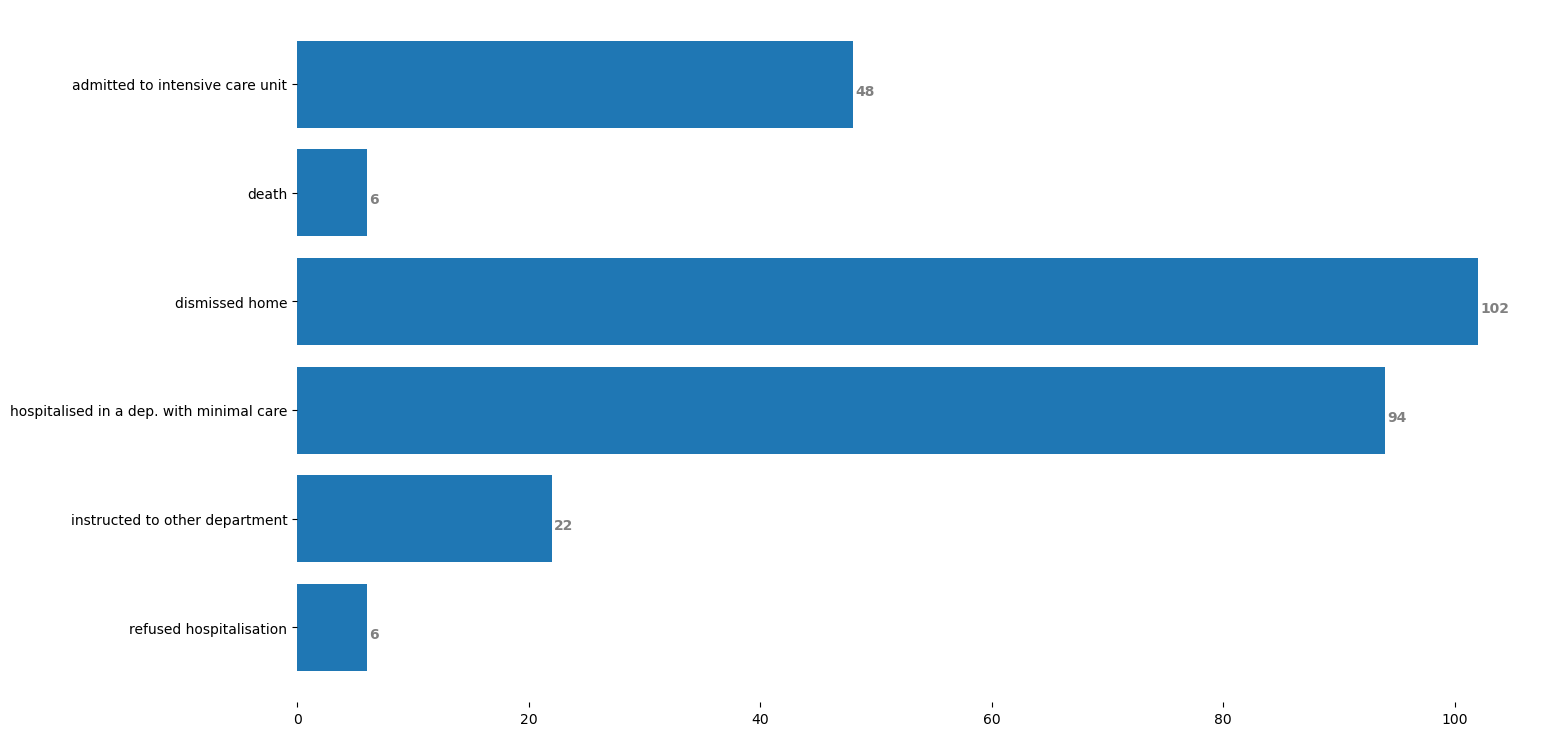

In [35]:
admission_categories = freq_table_admission["frequency"].keys()
admission_freq = freq_table_admission["frequency"].values

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(admission_categories, admission_freq)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

## Was the patient ever admitted to intensive care unit

In [36]:
dataset["ICU"].unique()

array([0, 1])

In [37]:
freq_table_icu = pd.crosstab(dataset["ICU"], "frequency")
freq_table_icu["rel_frequency"] = freq_table_icu['frequency']/len(dataset["ICU"])
freq_table_icu

col_0  frequency  rel_frequency
ICU                            
0            220       0.791367
1             58       0.208633

## Did the patient die while observed

In [38]:
dataset["SMRT"].unique()

array([0, 1])

In [39]:
freq_table_death = pd.crosstab(dataset["SMRT"], "frequency")
freq_table_death["rel_frequency"] = freq_table_death["frequency"]/len(dataset["SMRT"])
freq_table_death

col_0  frequency  rel_frequency
SMRT                           
0            239       0.859712
1             39       0.140288

In [40]:
dataset["dead"] = dataset["SMRT"]

## Respiration

In [41]:
dataset["RESPIRACIJE_1"].describe()

count    278.000000
mean      15.388489
std        2.158054
min       10.000000
25%       14.000000
50%       15.000000
75%       16.000000
max       24.000000
Name: RESPIRACIJE_1, dtype: float64

In [42]:
dataset["RESPIRACIJE_1"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: RESPIRACIJE_1, dtype: object

In [43]:
dataset["respiration"] = dataset["RESPIRACIJE_1"]
dataset["respiration"].head()

0    18
1    19
2    16
3    14
4    18
Name: respiration, dtype: int64

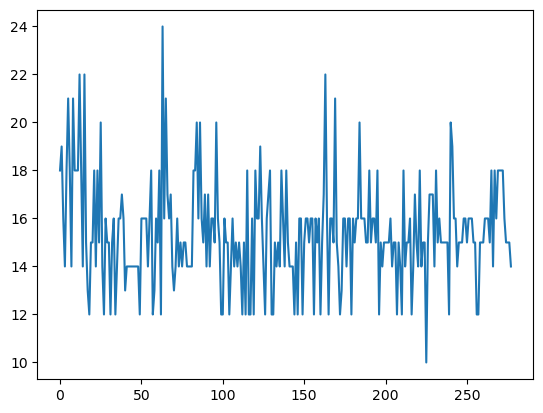

In [44]:
plt.plot(dataset["respiration"])

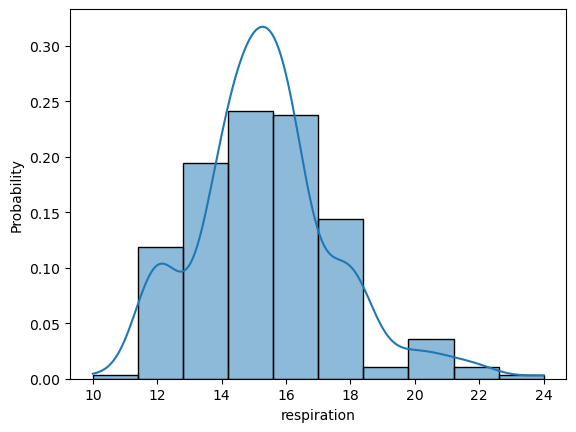

In [45]:
sns.histplot(dataset["respiration"], kde=True, stat="probability", bins=10)
plt.show()

## SPO2

In [46]:
dataset["SPO2_1"].describe()

count    257.000000
mean      93.957198
std        7.864211
min       43.000000
25%       94.000000
50%       97.000000
75%       98.000000
max      100.000000
Name: SPO2_1, dtype: float64

In [47]:
dataset["SPO2_1"].head()

0    98.0
1     NaN
2    97.0
3    93.0
4     NaN
Name: SPO2_1, dtype: float64

In [48]:
dataset["SPO2_1"].isnull().describe()

count       278
unique        2
top       False
freq        257
Name: SPO2_1, dtype: object

In [49]:
278-257

21

In [50]:
dataset["SPO22_1"].describe()

count    21.000000
mean     91.285714
std       6.573757
min      75.000000
25%      87.000000
50%      91.000000
75%      97.000000
max      99.000000
Name: SPO22_1, dtype: float64

In [51]:
dataset["SPO22_1"].head()

0     NaN
1    90.0
2     NaN
3     NaN
4    92.0
Name: SPO22_1, dtype: float64

In [52]:
dataset["SPO22_1"].isnull().describe()

count      278
unique       2
top       True
freq       257
Name: SPO22_1, dtype: object

In [53]:
dataset["cronic_ops_lung_disease"] = [0 if i == True else 1 for i in dataset["SPO22_1"].isnull()]
pd.crosstab(dataset["cronic_ops_lung_disease"], "frequency")

col_0                    frequency
cronic_ops_lung_disease           
0                              257
1                               21

In [54]:
dataset["SPO22_1"].isnull()

0       True
1      False
2       True
3       True
4      False
       ...  
273    False
274     True
275     True
276     True
277     True
Name: SPO22_1, Length: 278, dtype: bool

In [55]:
dataset["spo2"] = [dataset["SPO2_1"][i] if dataset["SPO2_1"].isnull()[i] == False 
                   else dataset["SPO22_1"][i] for i in range(len(dataset["SPO2_1"]))]
dataset["spo2"].describe()

count    278.000000
mean      93.755396
std        7.795992
min       43.000000
25%       93.000000
50%       97.000000
75%       98.000000
max      100.000000
Name: spo2, dtype: float64

In [56]:
dataset["spo2"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: spo2, dtype: object

## Oxygen

In [57]:
dataset["KISIK_1"].describe()

count    278.000000
mean       0.237410
std        0.426263
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: KISIK_1, dtype: float64

In [58]:
dataset["KISIK_1"].unique()

array([0, 1])

In [59]:
dataset["KISIK_1"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: KISIK_1, dtype: object

In [60]:
dataset["oxygen"] = dataset["KISIK_1"]

## Blood pressure

In [61]:
dataset["TLAK_1"].describe()

count    278.000000
mean     133.586331
std       31.176071
min       60.000000
25%      113.000000
50%      133.500000
75%      150.000000
max      242.000000
Name: TLAK_1, dtype: float64

In [62]:
dataset["TLAK_1"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: TLAK_1, dtype: object

In [63]:
dataset["blood_pressure"] = dataset["TLAK_1"]

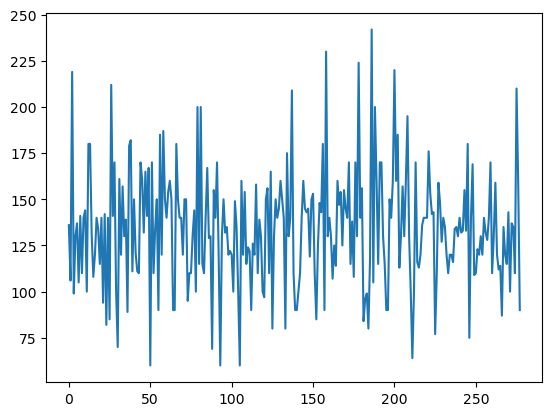

In [64]:
plt.plot(dataset["blood_pressure"])

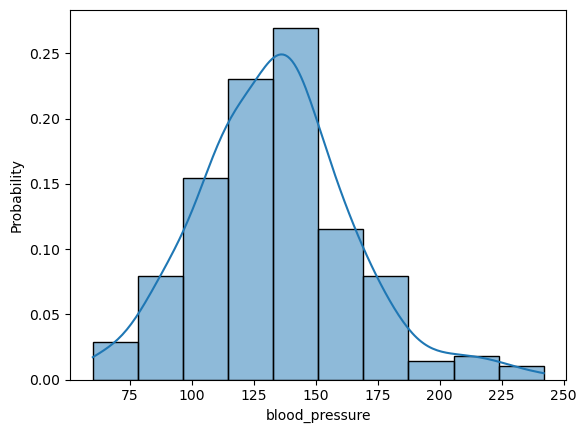

In [65]:
sns.histplot(dataset["blood_pressure"], kde=True, stat="probability", bins=10)
plt.show()

## Puls

In [66]:
dataset["PULS_1"].describe()

count    278.000000
mean      90.449640
std       25.164211
min       30.000000
25%       75.000000
50%       87.000000
75%      102.000000
max      189.000000
Name: PULS_1, dtype: float64

In [67]:
dataset["PULS_1"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: PULS_1, dtype: object

In [68]:
dataset["PULS_1"].unique()

array([ 56, 100,  42,  53,  70,  90,  64, 112,  88, 130,  86,  99,  38,
       108,  73,  85,  84, 125, 120, 111,  74,  78,  89,  95,  68,  83,
        81,  30, 109, 105, 110,  76, 122,  75,  87, 150, 127,  79, 115,
       101,  60, 102,  80,  72,  91,  94, 140,  62, 103, 155,  82, 142,
       124,  66,  98, 132,  61,  67, 148,  63,  93,  69, 107,  55, 169,
        59,  51,  43,  97, 156, 161,  71, 160, 128, 113,  65,  50,  77,
        96, 123,  92, 129, 137, 136, 189,  45, 118, 139, 138])

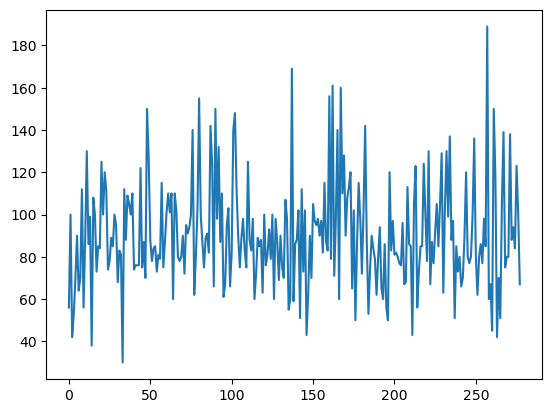

In [69]:
plt.plot(dataset["PULS_1"])

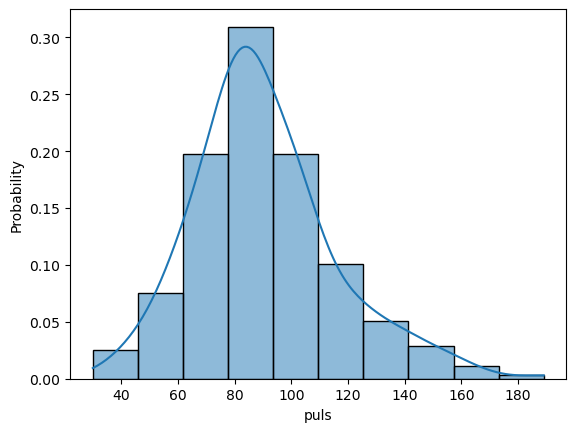

In [70]:
dataset["puls"] = dataset["PULS_1"]
sns.histplot(dataset["puls"], kde=True, stat="probability", bins=10)
plt.show()

## Consciousness

In [71]:
dataset["SVIJEST_1"].head()

0    1
1    1
2    1
3    1
4    1
Name: SVIJEST_1, dtype: int64

In [72]:
dataset["SVIJEST_1"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: SVIJEST_1, dtype: object

In [73]:
dataset["SVIJEST_1"].unique()

array([1, 2, 4, 3])

In [74]:
dataset["conscious"] = dataset["SVIJEST_1"]

## Temperature

In [75]:
dataset["TEMPERATURA_1"].head()

0    36.1
1    36.1
2    36.1
3    36.1
4    36.1
Name: TEMPERATURA_1, dtype: float64

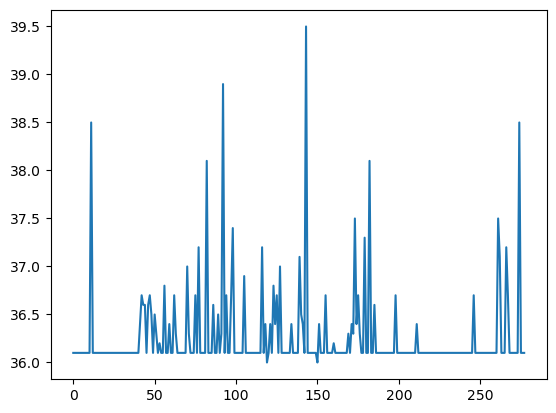

In [76]:
dataset["temperature"] = dataset["TEMPERATURA_1"]
plt.plot(dataset["temperature"])

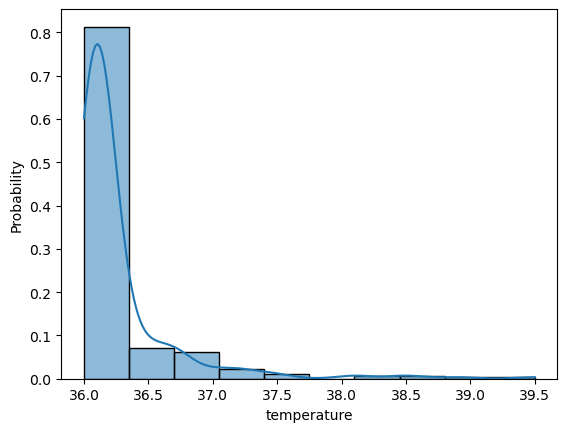

In [77]:
sns.histplot(dataset["temperature"], kde=True, stat="probability", bins=10)
plt.show()

In [78]:
dataset["temperature"].isnull().describe()

count       278
unique        1
top       False
freq        278
Name: temperature, dtype: object

In [79]:
dataset["temperature"].describe()

count    278.000000
mean      36.264029
std        0.445111
min       36.000000
25%       36.100000
50%       36.100000
75%       36.100000
max       39.500000
Name: temperature, dtype: float64

The next question is concerned with the variable puls which doesn't have linear relation with odds (I checked that with woe later and got back here). The logic truly is that increasing puls does not necessarity increase risk linearly because sometimes increasing does that and sometimes decreasing does that. So because of that, let's make new variable puls_abs which will tell us how much does puls deviates from a single value - most neutral one. Let that be 80. 

In [80]:
dataset["puls_abs"] = abs(dataset["puls"] - 80)

In [81]:
dataset[["puls", "puls_abs"]]

puls  puls_abs
0      56        24
1     100        20
2      42        38
3      53        27
4      70        10
..    ...       ...
273    94        14
274    84         4
275   123        43
276   101        21
277    67        13

[278 rows x 2 columns]

# Preprocessing for discrete variables

Those are sex, residence, reason, cronic_ops_lung_disease, oxygen, conscious

In [82]:
dataset_dummies = [pd.get_dummies(dataset['sex'], prefix = 'sex', prefix_sep = ':'),
                   pd.get_dummies(dataset['residence'], prefix = 'residence', prefix_sep = ':'),
                   pd.get_dummies(dataset['reason'], prefix = 'reason', prefix_sep = ':'),
                   pd.get_dummies(dataset['cronic_ops_lung_disease'], 
                                   prefix = 'cronic_ops_lung_disease', prefix_sep = ':'),
                   pd.get_dummies(dataset['oxygen'], prefix = 'oxygen', prefix_sep = ':'),
                   pd.get_dummies(dataset['conscious'], prefix = 'conscious', prefix_sep = ':')]

In [83]:
dataset_dummies = pd.concat(dataset_dummies, axis=1)
dataset_dummies.head()

sex:F  sex:M  residence:city  residence:village  reason:0  reason:6  \
0      0      1               1                  0         0         1   
1      1      0               1                  0         1         0   
2      1      0               1                  0         0         0   
3      1      0               1                  0         1         0   
4      1      0               1                  0         1         0   

   reason:9  cronic_ops_lung_disease:0  cronic_ops_lung_disease:1  oxygen:0  \
0         0                          1                          0         1   
1         0                          0                          1         0   
2         1                          1                          0         1   
3         0                          1                          0         0   
4         0                          0                          1         1   

   oxygen:1  conscious:1  conscious:2  conscious:3  conscious:4  
0         0            1            0            0            0  
1         1            1            0            0            0  
2         0            1            0            0            0  
3         1            1            0            0            0  
4         0            1            0            0            0

In [84]:
dataset = pd.concat([dataset, dataset_dummies], axis = 1)
dataset.head()

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  ...  \
0   1     1       1  1936          6       1     1.0      1.0    0     0  ...   
1   2     2       1  1972         10       1     3.0      4.0    0     0  ...   
2   3     2       1  1946          9       4     5.0      1.0    1     0  ...   
3   4     2       1  1927         11       6     1.0      2.0    0     0  ...   
4   5     2       1  1934         10       3     3.0      1.0    0     0  ...   

   reason:6  reason:9  cronic_ops_lung_disease:0  cronic_ops_lung_disease:1  \
0         1         0                          1                          0   
1         0         0                          0                          1   
2         0         1                          1                          0   
3         0         0                          1                          0   
4         0         0                          0                          1   

   oxygen:0  oxygen:1  conscious:1  conscious:2  conscious:3  conscious:4  
0         1         0            1            0            0            0  
1         0         1            1            0            0            0  
2         1         0            1            0            0            0  
3         0         1            1            0            0            0  
4         1         0            1            0            0            0  

[5 rows x 144 columns]

In [85]:
dataset.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [86]:
pd.options.display.max_rows = None
dataset.isnull().sum()

RB                             0
SPOL                           0
MJESTO                         0
DOB                            0
RAZLOG/dg                      0
OTPUST                         0
2 DANA                         6
30 DANA                       11
ICU                            0
SMRT                           0
RIZIK_POJEDINACNI              0
RIZIK_UKUPNI                   0
RESPIRACIJE_1                  0
RESP_BOD_1                     0
SPO2_1                        21
SPO2_BOD_1                    21
SPO22_1                      257
SPO22_BOD_1                  257
KISIK_1                        0
KISIK_BOD_1                    0
TLAK_1                         0
TLAK_BOD_1                     0
PULS_1                         0
PULS_BOD_1                     0
SVIJEST_1                      0
SVIJEST_BOD_1                  0
TEMPERATURA_1                  0
TEMP_BOD_1                     0
UKUPNI_BODOVI_1                0
RESPIRACIJE_2                  0
RESP_BOD_2

There are no missing values in our dummy variables. yaay!

For the dependent variable we will look at (death) and (death or icu). Let's add one more column to indicate if patient died or went to icu.

In [87]:
dataset[["ICU", "dead"]]

ICU  dead
0      0     0
1      0     0
2      1     0
3      0     0
4      0     0
5      0     1
6      1     0
7      0     0
8      1     0
9      1     0
10     1     0
11     0     0
12     0     0
13     1     0
14     0     1
15     0     1
16     0     0
17     0     0
18     0     0
19     0     0
20     0     0
21     0     0
22     1     0
23     0     0
24     0     0
25     0     0
26     0     0
27     1     0
28     0     1
29     0     1
30     0     0
31     0     0
32     0     0
33     0     0
34     0     0
35     0     0
36     0     1
37     0     0
38     0     0
39     0     0
40     0     0
41     0     0
42     0     0
43     0     0
44     0     0
45     0     0
46     0     0
47     0     0
48     0     0
49     0     0
50     0     0
51     0     0
52     0     0
53     0     0
54     1     1
55     0     0
56     0     0
57     0     0
58     0     0
59     0     0
60     0     0
61     0     0
62     1     0
63     1     1
64     1     1
65     1     1
66     1     0
67     0     1
68     0     0
69     0     0
70     0     0
71     0     0
72     0     0
73     1     0
74     0     0
75     0     0
76     1     0
77     0     0
78     1     0
79     0     0
80     1     0
81     1     0
82     1     1
83     1     0
84     1     0
85     1     0
86     0     0
87     1     0
88     0     1
89     1     0
90     0     0
91     0     1
92     0     1
93     0     0
94     0     0
95     0     0
96     0     0
97     1     0
98     0     1
99     0     0
100    0     0
101    0     0
102    0     0
103    0     0
104    0     0
105    0     1
106    1     0
107    1     0
108    0     0
109    0     0
110    1     0
111    0     0
112    1     0
113    0     0
114    0     0
115    0     0
116    0     0
117    0     0
118    0     0
119    0     0
120    0     0
121    0     0
122    0     0
123    1     1
124    0     0
125    0     0
126    1     0
127    0     0
128    0     0
129    0     0
130    0     0
131    1     1
132    0     0
133    1     1
134    0     0
135    0     0
136    0     0
137    0     0
138    0     0
139    0     0
140    0     0
141    0     0
142    0     0
143    1     0
144    0     0
145    0     0
146    0     0
147    0     0
148    1     1
149    0     0
150    0     0
151    0     0
152    0     0
153    0     0
154    1     0
155    0     0
156    0     0
157    0     1
158    0     0
159    0     0
160    1     0
161    0     0
162    0     0
163    0     0
164    1     0
165    0     0
166    0     0
167    0     0
168    0     0
169    0     0
170    1     1
171    0     0
172    0     0
173    0     0
174    0     0
175    0     0
176    1     0
177    0     0
178    0     0
179    1     0
180    0     0
181    0     0
182    1     1
183    0     1
184    1     1
185    0     0
186    0     0
187    0     0
188    0     0
189    1     0
190    1     1
191    0     0
192    0     0
193    0     0
194    0     0
195    0     1
196    0     0
197    0     0
198    0     0
199    0     0
200    0     0
201    1     0
202    0     0
203    0     0
204    0     0
205    0     0
206    1     1
207    1     0
208    1     0
209    0     0
210    0     0
211    0     1
212    0     0
213    1     0
214    0     0
215    0     0
216    0     0
217    0     0
218    1     1
219    0     0
220    1     1
221    0     0
222    0     0
223    0     0
224    0     0
225    0     0
226    0     0
227    0     0
228    0     0
229    0     1
230    0     0
231    0     0
232    1     0
233    1     0
234    0     0
235    0     0
236    0     0
237    0     0
238    0     0
239    0     0
240    0     0
241    1     0
242    0     0
243    0     0
244    0     0
245    0     0
246    0     1
247    0     0
248    0     0
249    1     1
250    0     0
251    0     0
252    0     0
253    1     0
254    0     0
255    0     1
256    0     0
257    0     0
258    0     0
259    0     0
260    0     0
261    0     0
262    0     0
263    0     1
264    0     0
265    0     0


In [88]:
dataset[["ICU", "dead"]].max(axis=1)

0      0
1      0
2      1
3      0
4      0
5      1
6      1
7      0
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     1
63     1
64     1
65     1
66     1
67     1
68     0
69     0
70     0
71     0
72     0
73     1
74     0
75     0
76     1
77     0
78     1
79     0
80     1
81     1
82     1
83     1
84     1
85     1
86     0
87     1
88     1
89     1
90     0
91     1
92     1
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    1
106    1
107    1
108    0
109    0
110    1
1

In [89]:
dataset["dead_icu"] = dataset[["ICU", "dead"]].max(axis=1)

In [90]:
dataset.head()

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  ...  \
0   1     1       1  1936          6       1     1.0      1.0    0     0  ...   
1   2     2       1  1972         10       1     3.0      4.0    0     0  ...   
2   3     2       1  1946          9       4     5.0      1.0    1     0  ...   
3   4     2       1  1927         11       6     1.0      2.0    0     0  ...   
4   5     2       1  1934         10       3     3.0      1.0    0     0  ...   

   reason:9  cronic_ops_lung_disease:0  cronic_ops_lung_disease:1  oxygen:0  \
0         0                          1                          0         1   
1         0                          0                          1         0   
2         1                          1                          0         1   
3         0                          1                          0         0   
4         0                          0                          1         1   

   oxygen:1  conscious:1  conscious:2  conscious:3  conscious:4  dead_icu  
0         0            1            0            0            0         0  
1         1            1            0            0            0         0  
2         0            1            0            0            0         1  
3         1            1            0            0            0         0  
4         0            1            0            0            0         0  

[5 rows x 145 columns]

In [91]:
import math
for i,j in enumerate(dataset["dead"]):
    if math.isnan(j) == True:
        print(j)

In [92]:
dataset[["sex", "dead"]]

sex  dead
0     M     0
1     F     0
2     F     0
3     F     0
4     F     0
5     F     1
6     M     0
7     M     0
8     F     0
9     M     0
10    M     0
11    F     0
12    M     0
13    M     0
14    F     1
15    M     1
16    M     0
17    F     0
18    M     0
19    F     0
20    F     0
21    F     0
22    F     0
23    F     0
24    M     0
25    F     0
26    F     0
27    F     0
28    F     1
29    M     1
30    M     0
31    M     0
32    M     0
33    M     0
34    F     0
35    M     0
36    F     1
37    F     0
38    M     0
39    F     0
40    F     0
41    M     0
42    F     0
43    F     0
44    F     0
45    F     0
46    F     0
47    F     0
48    M     0
49    M     0
50    F     0
51    F     0
52    F     0
53    F     0
54    F     1
55    F     0
56    F     0
57    M     0
58    F     0
59    F     0
60    M     0
61    F     0
62    F     0
63    F     1
64    F     1
65    M     1
66    M     0
67    M     1
68    F     0
69    M     0
70    M     0
71    M     0
72    M     0
73    M     0
74    M     0
75    M     0
76    F     0
77    M     0
78    M     0
79    M     0
80    F     0
81    F     0
82    M     1
83    F     0
84    F     0
85    M     0
86    F     0
87    M     0
88    F     1
89    M     0
90    F     0
91    M     1
92    F     1
93    F     0
94    M     0
95    F     0
96    M     0
97    F     0
98    F     1
99    M     0
100   M     0
101   M     0
102   M     0
103   F     0
104   F     0
105   F     1
106   M     0
107   M     0
108   F     0
109   F     0
110   F     0
111   F     0
112   F     0
113   M     0
114   F     0
115   F     0
116   F     0
117   F     0
118   F     0
119   M     0
120   M     0
121   M     0
122   F     0
123   M     1
124   F     0
125   F     0
126   F     0
127   F     0
128   F     0
129   M     0
130   M     0
131   M     1
132   M     0
133   F     1
134   F     0
135   M     0
136   M     0
137   F     0
138   F     0
139   M     0
140   M     0
141   M     0
142   M     0
143   M     0
144   M     0
145   M     0
146   F     0
147   M     0
148   F     1
149   M     0
150   F     0
151   M     0
152   M     0
153   F     0
154   M     0
155   M     0
156   M     0
157   F     1
158   M     0
159   F     0
160   F     0
161   F     0
162   F     0
163   F     0
164   F     0
165   F     0
166   F     0
167   F     0
168   M     0
169   M     0
170   M     1
171   F     0
172   M     0
173   F     0
174   M     0
175   M     0
176   F     0
177   M     0
178   F     0
179   M     0
180   F     0
181   M     0
182   F     1
183   M     1
184   M     1
185   F     0
186   F     0
187   M     0
188   F     0
189   F     0
190   F     1
191   F     0
192   F     0
193   M     0
194   F     0
195   F     1
196   F     0
197   F     0
198   F     0
199   M     0
200   M     0
201   F     0
202   F     0
203   F     0
204   F     0
205   F     0
206   F     1
207   F     0
208   F     0
209   F     0
210   F     0
211   M     1
212   F     0
213   M     0
214   M     0
215   F     0
216   F     0
217   M     0
218   M     1
219   M     0
220   M     1
221   F     0
222   F     0
223   M     0
224   F     0
225   F     0
226   F     0
227   M     0
228   M     0
229   F     1
230   F     0
231   F     0
232   M     0
233   F     0
234   M     0
235   F     0
236   F     0
237   M     0
238   M     0
239   F     0
240   M     0
241   M     0
242   F     0
243   M     0
244   M     0
245   F     0
246   F     1
247   M     0
248   M     0
249   F     1
250   F     0
251   F     0
252   M     0
253   M     0
254   M     0
255   F     1
256   F     0
257   F     0
258   M     0
259   M     0
260   M     0
261   M     0
262   F     0
263   M     1
264   M     0
265   M     0
266   M     0
267   M     1
268   F     0
269   F     0
270   M     0
271   F     0
272   M     0
273   M     0
274   F     0
275   F     0
276   F     0
277   M     1

# Test and train data

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
dataset_dead_inputs_train, dataset_dead_inputs_test, dataset_dead_targets_train, dataset_dead_targets_test = train_test_split(dataset.drop('dead', axis = 1), dataset['dead'], test_size = 0.01, random_state = 42)
dataset_deadicu_inputs_train, dataset_deadicu_inputs_test, dataset_deadicu_targets_train, dataset_deadicu_targets_test = train_test_split(dataset.drop('dead_icu', axis = 1), dataset['dead_icu'], test_size = 0.01, random_state = 42)

In [95]:
dataset_dead_inputs_train = dataset.drop('dead', axis=1)
dataset_dead_targets_train = dataset['dead']
dataset_deadicu_inputs_train = dataset.drop('dead_icu', axis=1)
dataset_deadicu_targets_train = dataset['dead_icu']

In [96]:
dataset_dead_inputs_train.shape

(278, 144)

In [97]:
dataset_dead_inputs_test.shape

(3, 144)

# Weight of evidence and Information value

In what follows we construct a weight of evidence table for all variables in order to see how different categories of the variable affects the fact that a patient was risky or not (risk in the first case is death, and in the secont is death or icu). We calculate Information value which is a real number from (0,1) and gives a measure of predictive power of the variable in question for the target variable. We use the following criterium: 
- IV in (0, 0.02) means the variable has no predictive power, 
- IV in (0.02, 0.1) means the variable has weak predictive power, 
- IV in (0.1, 0.3) means the variable has medium predictive power, 
- IV in (0.3, 0.5) means the variable has strong predictive power, and
- IV in (0.5, 1) means the variable has suspiciously strong predictive power (too good to be true).

In [98]:
df_d_inputs_prepr = dataset_dead_inputs_train
df_d_targets_prepr = dataset_dead_targets_train
df_di_inputs_prepr = dataset_deadicu_inputs_train
df_di_targets_prepr = dataset_deadicu_targets_train

#####
#df_d_inputs_prepr = dataset_dead_inputs_test
#df_d_targets_prepr = dataset_dead_targets_test
#df_di_inputs_prepr = dataset_deadicu_inputs_test
#df_di_targets_prepr = dataset_deadicu_targets_test

## Sex

In [99]:
df1 = pd.concat([dataset['sex'], df_d_targets_prepr], axis = 1)
df1

sex  dead
0     M     0
1     F     0
2     F     0
3     F     0
4     F     0
5     F     1
6     M     0
7     M     0
8     F     0
9     M     0
10    M     0
11    F     0
12    M     0
13    M     0
14    F     1
15    M     1
16    M     0
17    F     0
18    M     0
19    F     0
20    F     0
21    F     0
22    F     0
23    F     0
24    M     0
25    F     0
26    F     0
27    F     0
28    F     1
29    M     1
30    M     0
31    M     0
32    M     0
33    M     0
34    F     0
35    M     0
36    F     1
37    F     0
38    M     0
39    F     0
40    F     0
41    M     0
42    F     0
43    F     0
44    F     0
45    F     0
46    F     0
47    F     0
48    M     0
49    M     0
50    F     0
51    F     0
52    F     0
53    F     0
54    F     1
55    F     0
56    F     0
57    M     0
58    F     0
59    F     0
60    M     0
61    F     0
62    F     0
63    F     1
64    F     1
65    M     1
66    M     0
67    M     1
68    F     0
69    M     0
70    M     0
71    M     0
72    M     0
73    M     0
74    M     0
75    M     0
76    F     0
77    M     0
78    M     0
79    M     0
80    F     0
81    F     0
82    M     1
83    F     0
84    F     0
85    M     0
86    F     0
87    M     0
88    F     1
89    M     0
90    F     0
91    M     1
92    F     1
93    F     0
94    M     0
95    F     0
96    M     0
97    F     0
98    F     1
99    M     0
100   M     0
101   M     0
102   M     0
103   F     0
104   F     0
105   F     1
106   M     0
107   M     0
108   F     0
109   F     0
110   F     0
111   F     0
112   F     0
113   M     0
114   F     0
115   F     0
116   F     0
117   F     0
118   F     0
119   M     0
120   M     0
121   M     0
122   F     0
123   M     1
124   F     0
125   F     0
126   F     0
127   F     0
128   F     0
129   M     0
130   M     0
131   M     1
132   M     0
133   F     1
134   F     0
135   M     0
136   M     0
137   F     0
138   F     0
139   M     0
140   M     0
141   M     0
142   M     0
143   M     0
144   M     0
145   M     0
146   F     0
147   M     0
148   F     1
149   M     0
150   F     0
151   M     0
152   M     0
153   F     0
154   M     0
155   M     0
156   M     0
157   F     1
158   M     0
159   F     0
160   F     0
161   F     0
162   F     0
163   F     0
164   F     0
165   F     0
166   F     0
167   F     0
168   M     0
169   M     0
170   M     1
171   F     0
172   M     0
173   F     0
174   M     0
175   M     0
176   F     0
177   M     0
178   F     0
179   M     0
180   F     0
181   M     0
182   F     1
183   M     1
184   M     1
185   F     0
186   F     0
187   M     0
188   F     0
189   F     0
190   F     1
191   F     0
192   F     0
193   M     0
194   F     0
195   F     1
196   F     0
197   F     0
198   F     0
199   M     0
200   M     0
201   F     0
202   F     0
203   F     0
204   F     0
205   F     0
206   F     1
207   F     0
208   F     0
209   F     0
210   F     0
211   M     1
212   F     0
213   M     0
214   M     0
215   F     0
216   F     0
217   M     0
218   M     1
219   M     0
220   M     1
221   F     0
222   F     0
223   M     0
224   F     0
225   F     0
226   F     0
227   M     0
228   M     0
229   F     1
230   F     0
231   F     0
232   M     0
233   F     0
234   M     0
235   F     0
236   F     0
237   M     0
238   M     0
239   F     0
240   M     0
241   M     0
242   F     0
243   M     0
244   M     0
245   F     0
246   F     1
247   M     0
248   M     0
249   F     1
250   F     0
251   F     0
252   M     0
253   M     0
254   M     0
255   F     1
256   F     0
257   F     0
258   M     0
259   M     0
260   M     0
261   M     0
262   F     0
263   M     1
264   M     0
265   M     0
266   M     0
267   M     1
268   F     0
269   F     0
270   M     0
271   F     0
272   M     0
273   M     0
274   F     0
275   F     0
276   F     0
277   M     1

Here I have NaN for death (death_icu) because those patients belong to test set, and i here just show death for those who belong to train set.

In [100]:
df2 = pd.concat([dataset['sex'], df_di_targets_prepr], axis=1)
df2

sex  dead_icu
0     M         0
1     F         0
2     F         1
3     F         0
4     F         0
5     F         1
6     M         1
7     M         0
8     F         1
9     M         1
10    M         1
11    F         0
12    M         0
13    M         1
14    F         1
15    M         1
16    M         0
17    F         0
18    M         0
19    F         0
20    F         0
21    F         0
22    F         1
23    F         0
24    M         0
25    F         0
26    F         0
27    F         1
28    F         1
29    M         1
30    M         0
31    M         0
32    M         0
33    M         0
34    F         0
35    M         0
36    F         1
37    F         0
38    M         0
39    F         0
40    F         0
41    M         0
42    F         0
43    F         0
44    F         0
45    F         0
46    F         0
47    F         0
48    M         0
49    M         0
50    F         0
51    F         0
52    F         0
53    F         0
54    F         1
55    F         0
56    F         0
57    M         0
58    F         0
59    F         0
60    M         0
61    F         0
62    F         1
63    F         1
64    F         1
65    M         1
66    M         1
67    M         1
68    F         0
69    M         0
70    M         0
71    M         0
72    M         0
73    M         1
74    M         0
75    M         0
76    F         1
77    M         0
78    M         1
79    M         0
80    F         1
81    F         1
82    M         1
83    F         1
84    F         1
85    M         1
86    F         0
87    M         1
88    F         1
89    M         1
90    F         0
91    M         1
92    F         1
93    F         0
94    M         0
95    F         0
96    M         0
97    F         1
98    F         1
99    M         0
100   M         0
101   M         0
102   M         0
103   F         0
104   F         0
105   F         1
106   M         1
107   M         1
108   F         0
109   F         0
110   F         1
111   F         0
112   F         1
113   M         0
114   F         0
115   F         0
116   F         0
117   F         0
118   F         0
119   M         0
120   M         0
121   M         0
122   F         0
123   M         1
124   F         0
125   F         0
126   F         1
127   F         0
128   F         0
129   M         0
130   M         0
131   M         1
132   M         0
133   F         1
134   F         0
135   M         0
136   M         0
137   F         0
138   F         0
139   M         0
140   M         0
141   M         0
142   M         0
143   M         1
144   M         0
145   M         0
146   F         0
147   M         0
148   F         1
149   M         0
150   F         0
151   M         0
152   M         0
153   F         0
154   M         1
155   M         0
156   M         0
157   F         1
158   M         0
159   F         0
160   F         1
161   F         0
162   F         0
163   F         0
164   F         1
165   F         0
166   F         0
167   F         0
168   M         0
169   M         0
170   M         1
171   F         0
172   M         0
173   F         0
174   M         0
175   M         0
176   F         1
177   M         0
178   F         0
179   M         1
180   F         0
181   M         0
182   F         1
183   M         1
184   M         1
185   F         0
186   F         0
187   M         0
188   F         0
189   F         1
190   F         1
191   F         0
192   F         0
193   M         0
194   F         0
195   F         1
196   F         0
197   F         0
198   F         0
199   M         0
200   M         0
201   F         1
202   F         0
203   F         0
204   F         0
205   F         0
206   F         1
207   F         1
208   F         1
209   F         0
210   F         0
211   M         1
212   F         0
213   M         1
214   M         0
215   F         0
216   F         0
217   M         0
218   M         1
219   M         0
220   M         1
221   F 

In [101]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

sex  dead
0   F   152
1   M   126

In [102]:
df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].count()

sex  dead_icu
0   F       152
1   M       126

In [103]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

sex      dead
0   F  0.144737
1   M  0.134921

In [104]:
df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].mean()

sex  dead_icu
0   F  0.289474
1   M  0.285714

This mean corresponds to proportion of "ones" in each category.

In [105]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1

sex  dead sex      dead
0   F   152   F  0.144737
1   M   126   M  0.134921

In [106]:
df2 = pd.concat([df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].count(),
                df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].mean()], axis = 1)
df2

sex  dead_icu sex  dead_icu
0   F       152   F  0.289474
1   M       126   M  0.285714

In [107]:
df1 = df1.iloc[:, [0,1,3]]
df1

sex  dead      dead
0   F   152  0.144737
1   M   126  0.134921

In [108]:
df2 = df2.iloc[:, [0,1,3]]
df2

sex  dead_icu  dead_icu
0   F       152  0.289474
1   M       126  0.285714

In [109]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_dead']
df1

sex  n_obs  prop_dead
0   F    152   0.144737
1   M    126   0.134921

In [110]:
df2.columns = [df2.columns.values[0], 'n_obs', 'prop_dead_icu']
df2

sex  n_obs  prop_dead_icu
0   F    152       0.289474
1   M    126       0.285714

In [111]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

sex  n_obs  prop_dead  prop_n_obs
0   F    152   0.144737    0.546763
1   M    126   0.134921    0.453237

In [112]:
df2['prop_n_obs'] = df2['n_obs'] / df2['n_obs'].sum()
df2

sex  n_obs  prop_dead_icu  prop_n_obs
0   F    152       0.289474    0.546763
1   M    126       0.285714    0.453237

In [113]:
df1['n_dead'] = df1['n_obs'] * df1['prop_dead']
df1['n_alive'] = df1['n_obs'] * (1-df1['prop_dead'])
df1

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive
0   F    152   0.144737    0.546763    22.0    130.0
1   M    126   0.134921    0.453237    17.0    109.0

In [114]:
df2['n_dead_icu'] = df2['n_obs'] * df2['prop_dead_icu']
df2['n_alive_noicu'] = df2['n_obs'] * (1-df2['prop_dead_icu'])
df2

sex  n_obs  prop_dead_icu  prop_n_obs  n_dead_icu  n_alive_noicu
0   F    152       0.289474    0.546763        44.0          108.0
1   M    126       0.285714    0.453237        36.0           90.0

In [115]:
df1['prop_n_dead'] = df1['n_dead'] / df1['n_dead'].sum()
df1['prop_n_alive'] = df1['n_alive'] / df1['n_alive'].sum()
df1

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   F    152   0.144737    0.546763    22.0    130.0     0.564103   
1   M    126   0.134921    0.453237    17.0    109.0     0.435897   

   prop_n_alive  
0      0.543933  
1      0.456067

In [116]:
df2['prop_n_dead_icu'] = df2['n_dead_icu'] / df2['n_dead_icu'].sum()
df2['prop_n_alive_noicu'] = df2['n_alive_noicu'] / df2['n_alive_noicu'].sum()
df2

sex  n_obs  prop_dead_icu  prop_n_obs  n_dead_icu  n_alive_noicu  \
0   F    152       0.289474    0.546763        44.0          108.0   
1   M    126       0.285714    0.453237        36.0           90.0   

   prop_n_dead_icu  prop_n_alive_noicu  
0             0.55            0.545455  
1             0.45            0.454545

In [117]:
df1['WoE'] = np.log(df1['prop_n_dead'] / df1['prop_n_alive'])
# WoE = ln (%ones / %zeros)
df1

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   F    152   0.144737    0.546763    22.0    130.0     0.564103   
1   M    126   0.134921    0.453237    17.0    109.0     0.435897   

   prop_n_alive       WoE  
0      0.543933  0.036410  
1      0.456067 -0.045233

In [118]:
df2['WoE'] = np.log(df2['prop_n_dead_icu'] / df2['prop_n_alive_noicu'])
df2

sex  n_obs  prop_dead_icu  prop_n_obs  n_dead_icu  n_alive_noicu  \
0   F    152       0.289474    0.546763        44.0          108.0   
1   M    126       0.285714    0.453237        36.0           90.0   

   prop_n_dead_icu  prop_n_alive_noicu       WoE  
0             0.55            0.545455  0.008299  
1             0.45            0.454545 -0.010050

In [119]:
df1['diff_prop_dead'] = df1['prop_dead'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   F    152   0.144737    0.546763    22.0    130.0     0.564103   
1   M    126   0.134921    0.453237    17.0    109.0     0.435897   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE  
0      0.543933  0.036410             NaN       NaN  
1      0.456067 -0.045233        0.009816  0.081643

In [120]:
df2['diff_prop_dead_icu'] = df2['prop_dead_icu'].diff().abs()
df2['diff_WoE'] = df2['WoE'].diff().abs()
df2

sex  n_obs  prop_dead_icu  prop_n_obs  n_dead_icu  n_alive_noicu  \
0   F    152       0.289474    0.546763        44.0          108.0   
1   M    126       0.285714    0.453237        36.0           90.0   

   prop_n_dead_icu  prop_n_alive_noicu       WoE  diff_prop_dead_icu  diff_WoE  
0             0.55            0.545455  0.008299                 NaN       NaN  
1             0.45            0.454545 -0.010050            0.003759  0.018349

In [121]:
df1['IV'] = (df1['prop_n_dead'] - df1['prop_n_alive']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   F    152   0.144737    0.546763    22.0    130.0     0.564103   
1   M    126   0.134921    0.453237    17.0    109.0     0.435897   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.543933  0.036410             NaN       NaN  0.001647  
1      0.456067 -0.045233        0.009816  0.081643  0.001647

In [122]:
df2['IV'] = (df2['prop_n_dead_icu'] - df2['prop_n_alive_noicu']) * df2['WoE']
df2['IV'] = df2['IV'].sum()
df2

sex  n_obs  prop_dead_icu  prop_n_obs  n_dead_icu  n_alive_noicu  \
0   F    152       0.289474    0.546763        44.0          108.0   
1   M    126       0.285714    0.453237        36.0           90.0   

   prop_n_dead_icu  prop_n_alive_noicu       WoE  diff_prop_dead_icu  \
0             0.55            0.545455  0.008299                 NaN   
1             0.45            0.454545 -0.010050            0.003759   

   diff_WoE        IV  
0       NaN  0.000083  
1  0.018349  0.000083

Information value is very close to 0, which implies that the sex of the patient has no predictive power for his risk (neither for risk1 nor for risk2).

In [123]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_dead']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_dead'] = df['prop_dead'] * df['n_obs']
    df['n_alive'] = (1 - df['prop_dead']) * df['n_obs']
    df['prop_n_dead'] = df['n_dead'] / df['n_dead'].sum()
    df['prop_n_alive'] = df['n_alive'] / df['n_alive'].sum()
    df['WoE'] = np.log(df['prop_n_dead'] / df['prop_n_alive'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_dead'] = df['prop_dead'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_dead'] - df['prop_n_alive']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [125]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings.
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [126]:
df_temp = woe_discrete(df_d_inputs_prepr, 'sex', df_d_targets_prepr)
df_temp

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   M    126   0.134921    0.453237    17.0    109.0     0.435897   
1   F    152   0.144737    0.546763    22.0    130.0     0.564103   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.456067 -0.045233             NaN       NaN  0.001647  
1      0.543933  0.036410        0.009816  0.081643  0.001647

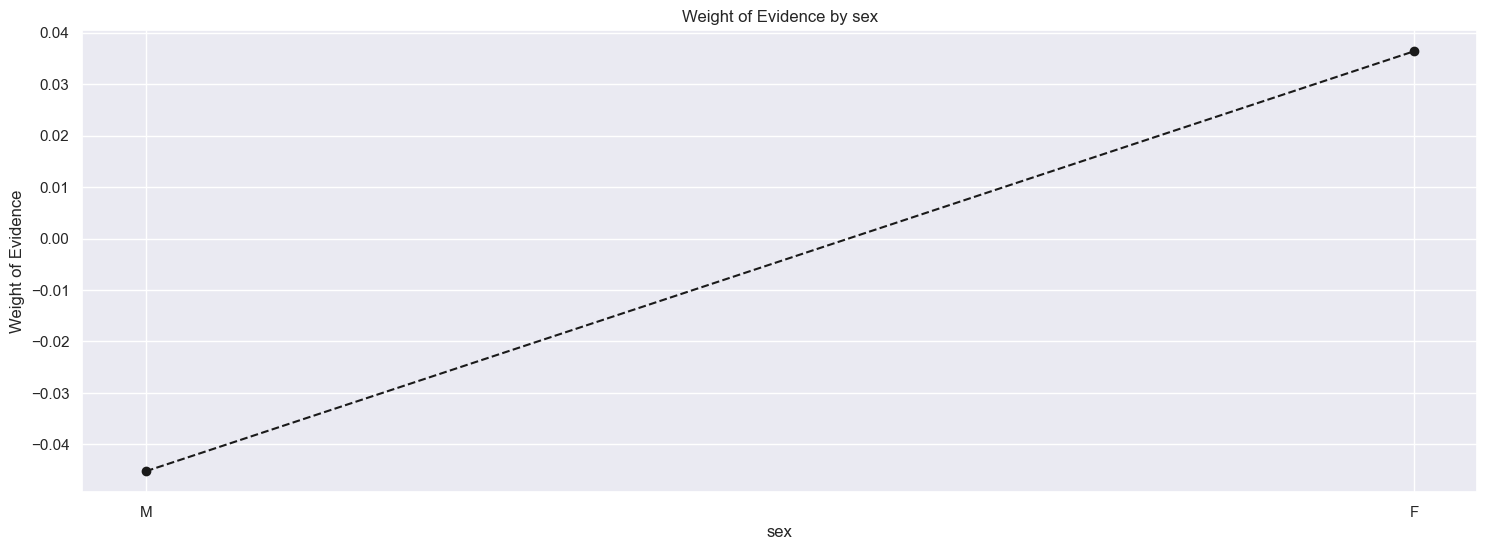

In [127]:
plot_by_woe(df_temp)

In [128]:
df_temp = woe_discrete(df_di_inputs_prepr, 'sex', df_di_targets_prepr)
df_temp

sex  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   M    126   0.285714    0.453237    36.0     90.0         0.45   
1   F    152   0.289474    0.546763    44.0    108.0         0.55   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.454545 -0.010050             NaN       NaN  0.000083  
1      0.545455  0.008299        0.003759  0.018349  0.000083

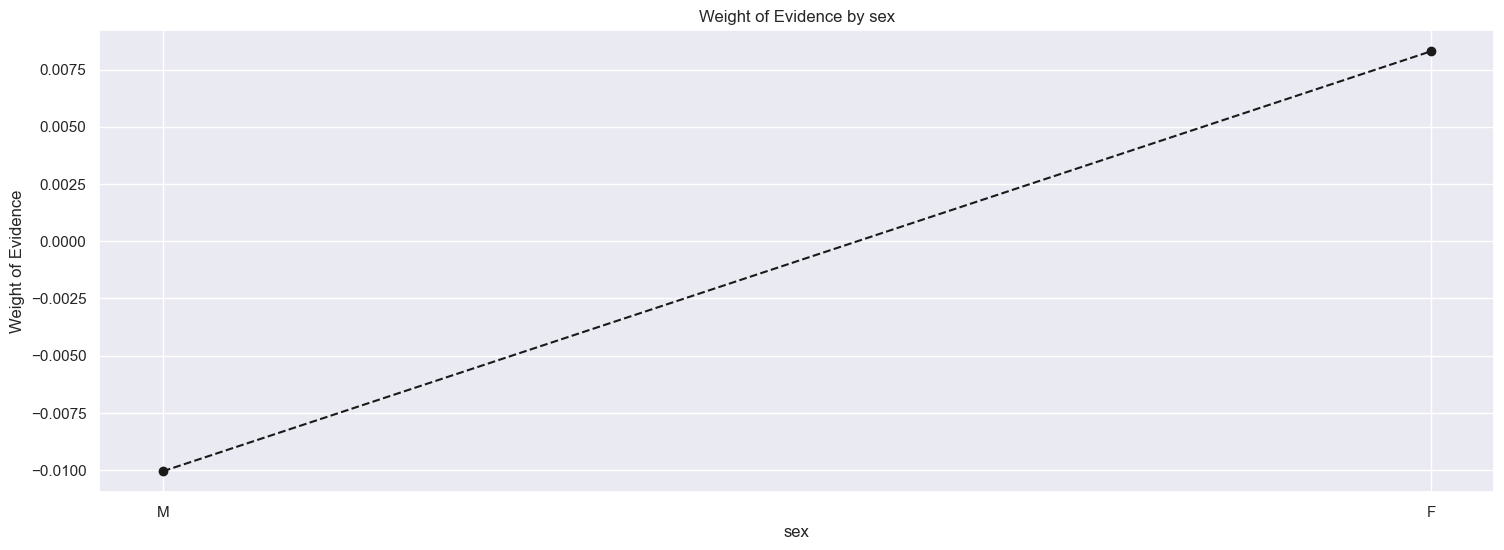

In [129]:
plot_by_woe(df_temp)

In [130]:
df_temp = woe_discrete(df_d_inputs_prepr, 'residence', df_d_targets_prepr)
df_temp

residence  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0   village    107   0.140187    0.384892    15.0     92.0     0.384615   
1      city    171   0.140351    0.615108    24.0    147.0     0.615385   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE            IV  
0      0.384937 -0.000836             NaN       NaN  4.375988e-07  
1      0.615063  0.000523        0.000164   0.00136  4.375988e-07

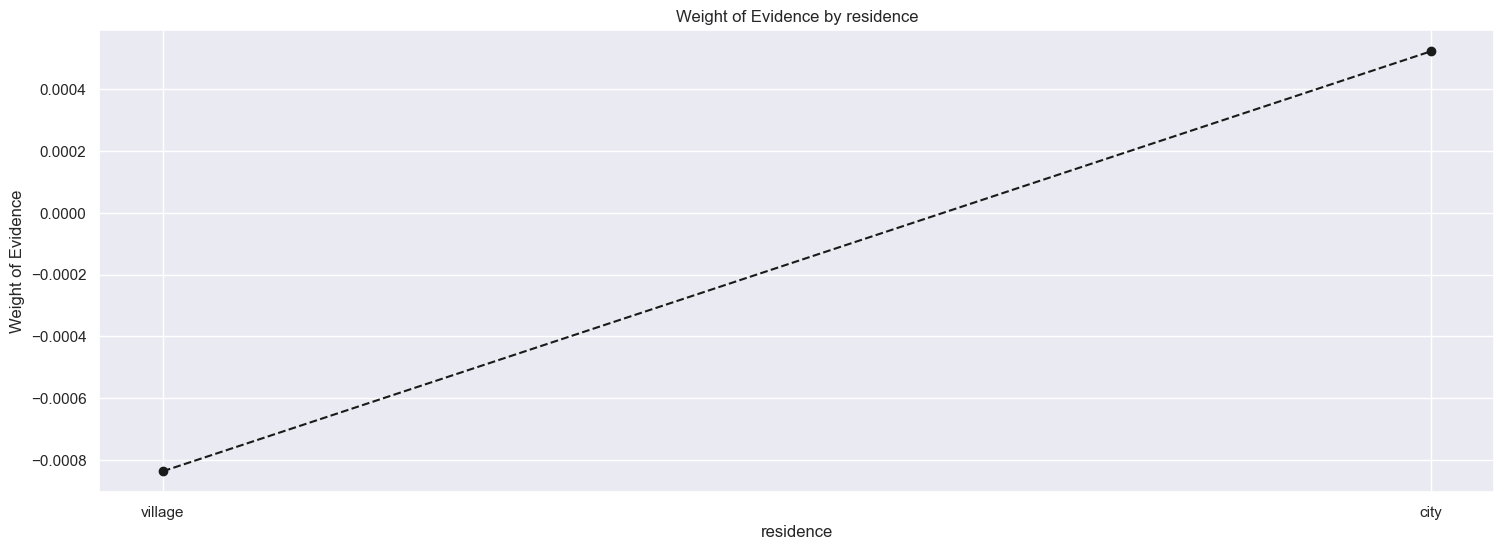

In [131]:
plot_by_woe(df_temp)

In [132]:
df_temp = woe_discrete(df_di_inputs_prepr, 'residence', df_di_targets_prepr)
df_temp

residence  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0      city    171   0.274854    0.615108    47.0    124.0       0.5875   
1   village    107   0.308411    0.384892    33.0     74.0       0.4125   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.626263 -0.063894             NaN       NaN  0.006302  
1      0.373737  0.098683        0.033557  0.162576  0.006302

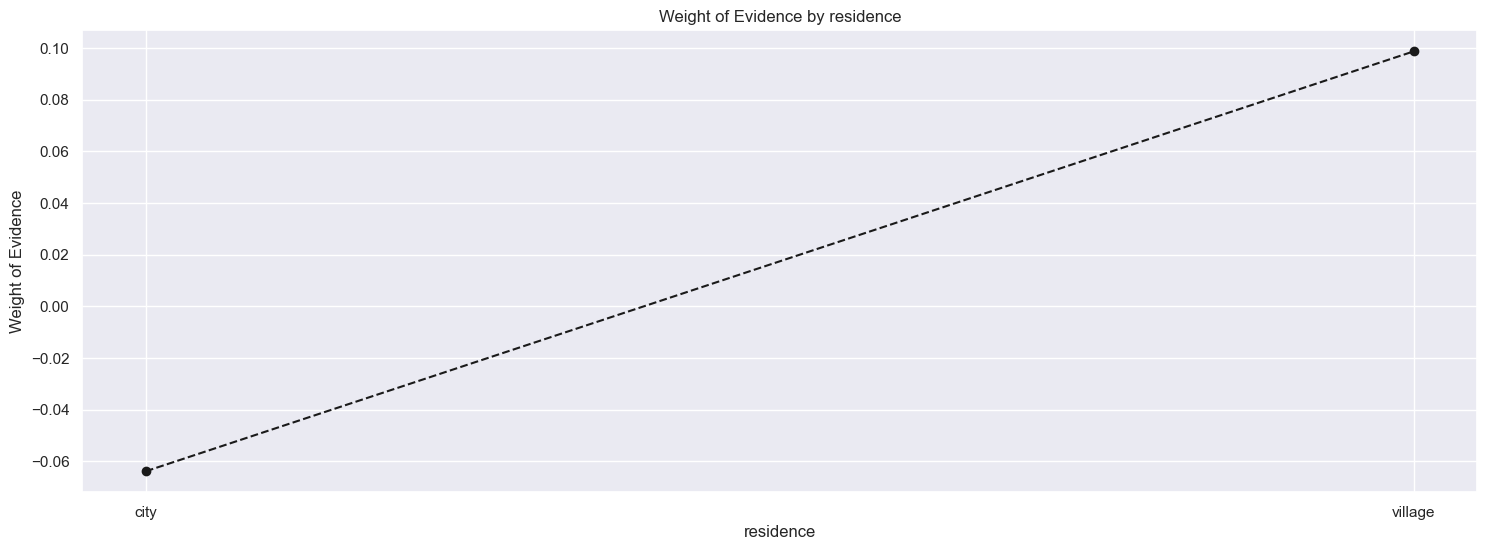

In [133]:
plot_by_woe(df_temp)

In [134]:
df_temp = woe_discrete(df_d_inputs_prepr, 'reason', df_d_targets_prepr)
df_temp

reason  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0       9     96   0.062500    0.345324     6.0     90.0     0.153846   
1       6     56   0.125000    0.201439     7.0     49.0     0.179487   
2       0    126   0.206349    0.453237    26.0    100.0     0.666667   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.376569 -0.895148             NaN       NaN  0.318411  
1      0.205021 -0.133008        0.062500  0.762140  0.318411  
2      0.418410  0.465828        0.081349  0.598837  0.318411

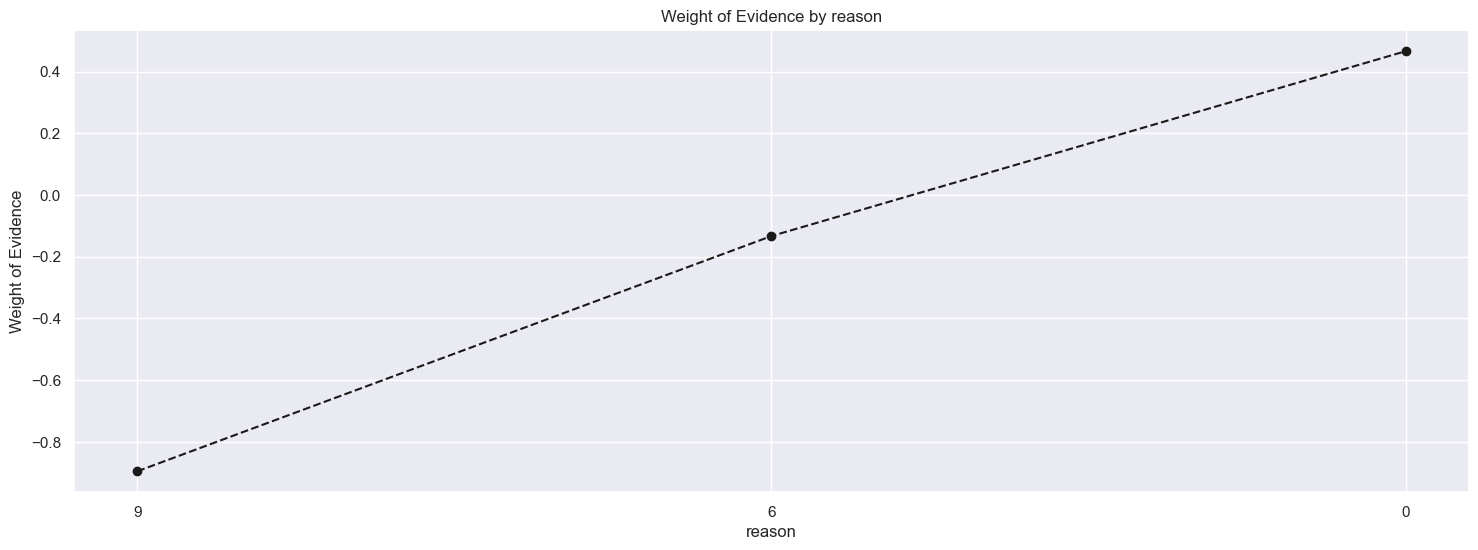

In [135]:
plot_by_woe(df_temp)

In [136]:
df_temp = woe_discrete(df_di_inputs_prepr, 'reason', df_di_targets_prepr)
df_temp

reason  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0       6     56   0.196429    0.201439    11.0     45.0       0.1375   
1       0    126   0.253968    0.453237    32.0     94.0       0.4000   
2       9     96   0.385417    0.345324    37.0     59.0       0.4625   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.227273 -0.502527             NaN       NaN  0.130245  
1      0.474747 -0.171318        0.057540  0.331208  0.130245  
2      0.297980  0.439621        0.131448  0.610939  0.130245

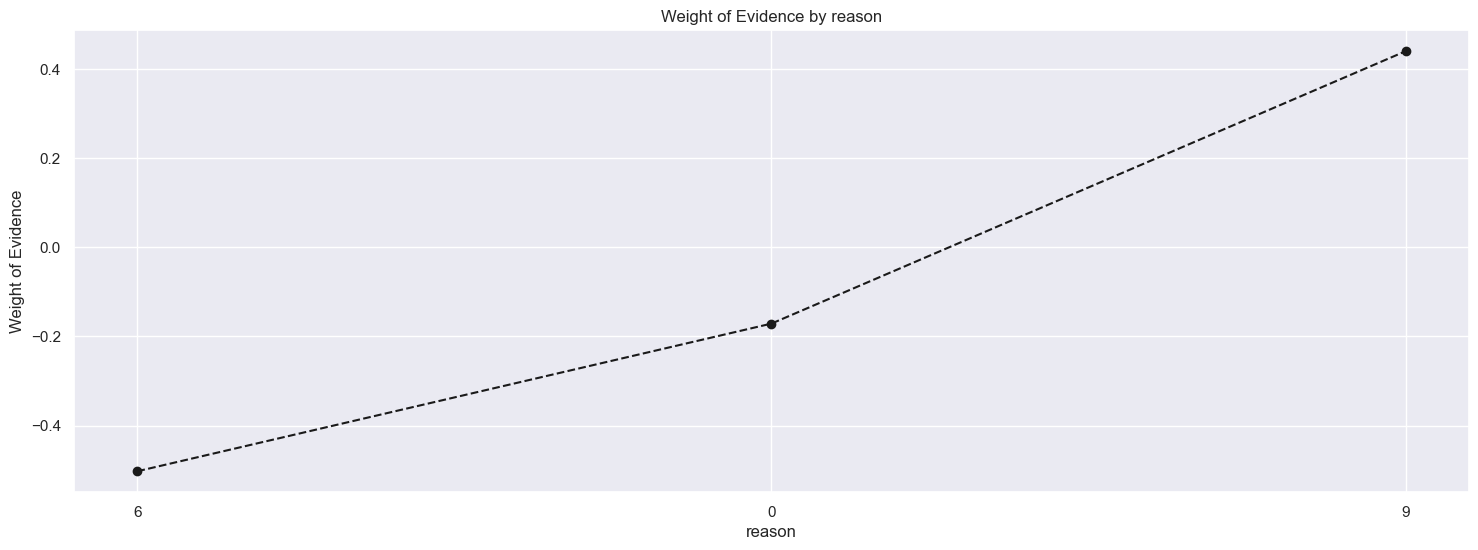

In [137]:
plot_by_woe(df_temp)

In [138]:
df_temp = woe_discrete(df_d_inputs_prepr, 'cronic_ops_lung_disease', df_d_targets_prepr)
df_temp

cronic_ops_lung_disease  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0                        1     21   0.095238     0.07554     2.0     19.0   
1                        0    257   0.143969     0.92446    37.0    220.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0     0.051282      0.079498 -0.438390             NaN       NaN  0.013221  
1     0.948718      0.920502  0.030192        0.048731  0.468582  0.013221

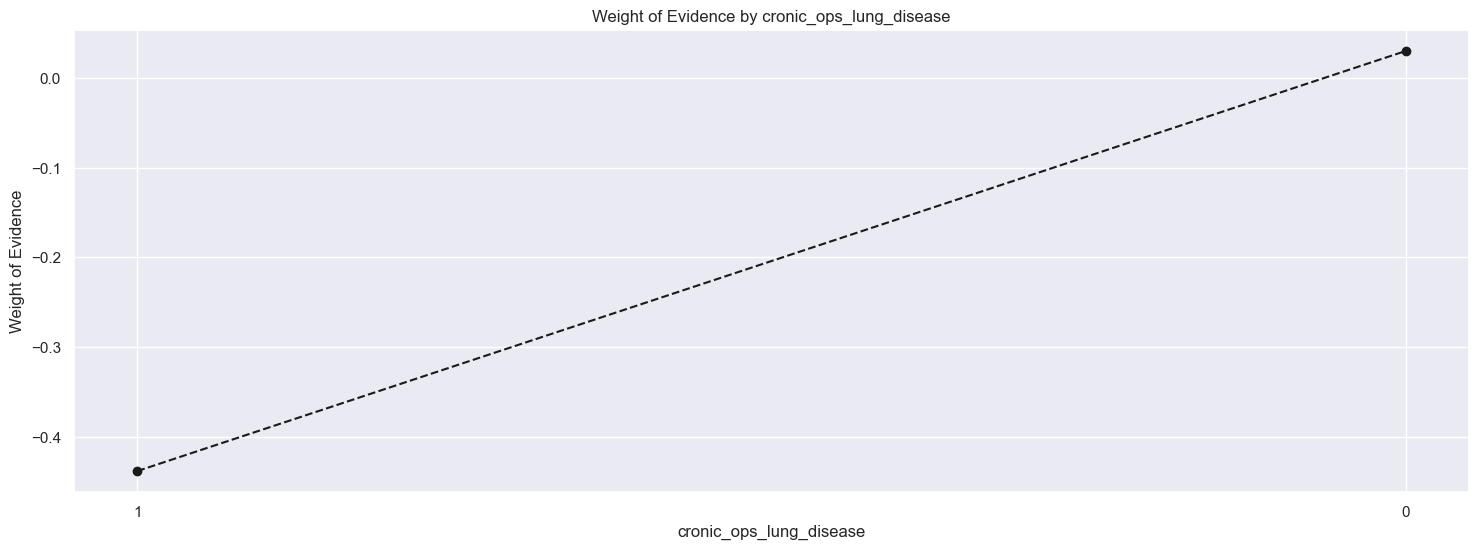

In [139]:
plot_by_woe(df_temp)

This variable has weak predictive power. 

In [140]:
df_temp = woe_discrete(df_di_inputs_prepr, 'cronic_ops_lung_disease', df_di_targets_prepr)
df_temp

cronic_ops_lung_disease  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0                        1     21   0.095238     0.07554     2.0     19.0   
1                        0    257   0.303502     0.92446    78.0    179.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0        0.025       0.09596 -1.345051             NaN       NaN  0.100806  
1        0.975       0.90404  0.075563        0.208264  1.420615  0.100806

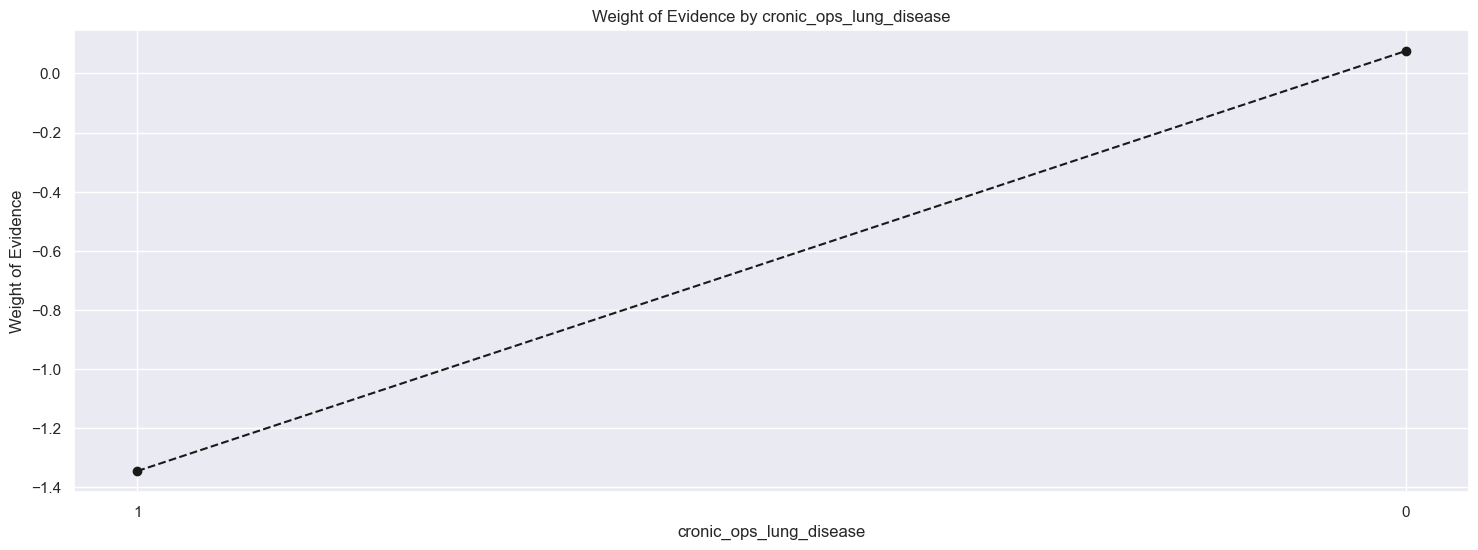

In [141]:
plot_by_woe(df_temp)

This variable has medium predictive power.

In [142]:
df_temp = woe_discrete(df_d_inputs_prepr, 'oxygen', df_d_targets_prepr)
df_temp

oxygen  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0       0    212   0.075472     0.76259    16.0    196.0     0.410256   
1       1     66   0.348485     0.23741    23.0     43.0     0.589744   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.820084 -0.692624             NaN       NaN  0.770402  
1      0.179916  1.187196        0.273013   1.87982  0.770402

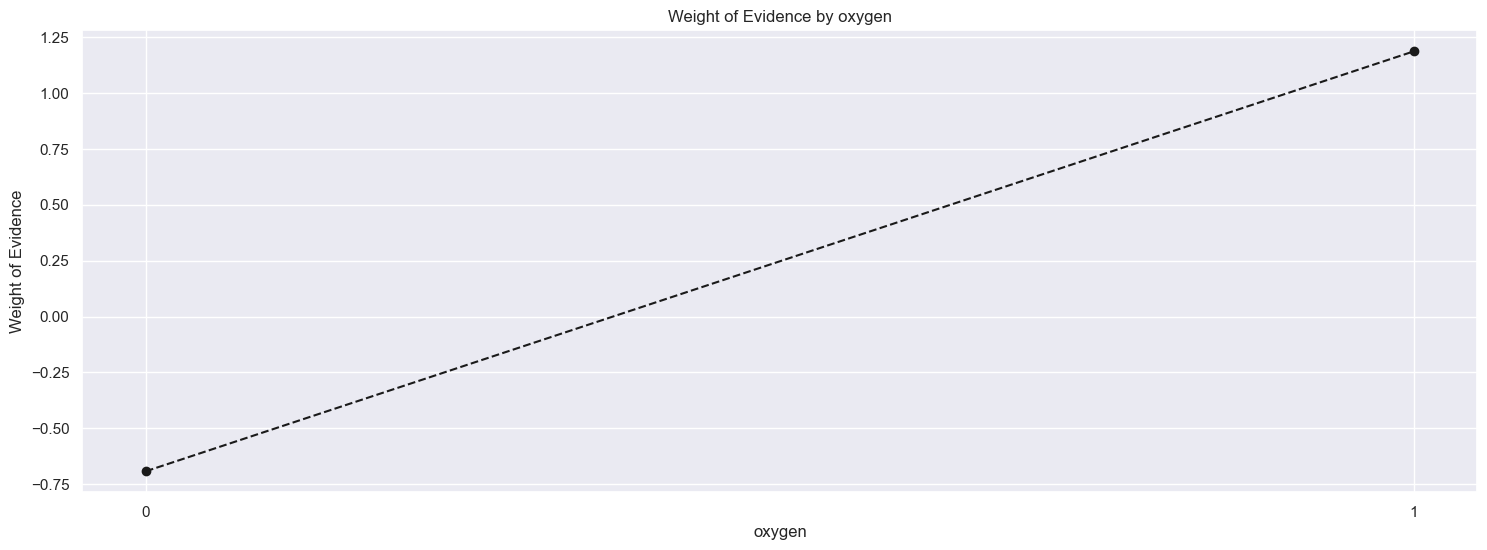

In [143]:
plot_by_woe(df_temp)

In [144]:
df_temp = woe_discrete(df_di_inputs_prepr, 'oxygen', df_di_targets_prepr)
df_temp

oxygen  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0       0    212   0.212264     0.76259    45.0    167.0       0.5625   
1       1     66   0.530303     0.23741    35.0     31.0       0.4375   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.843434 -0.405091             NaN       NaN  0.402492  
1      0.156566  1.027601        0.318039  1.432692  0.402492

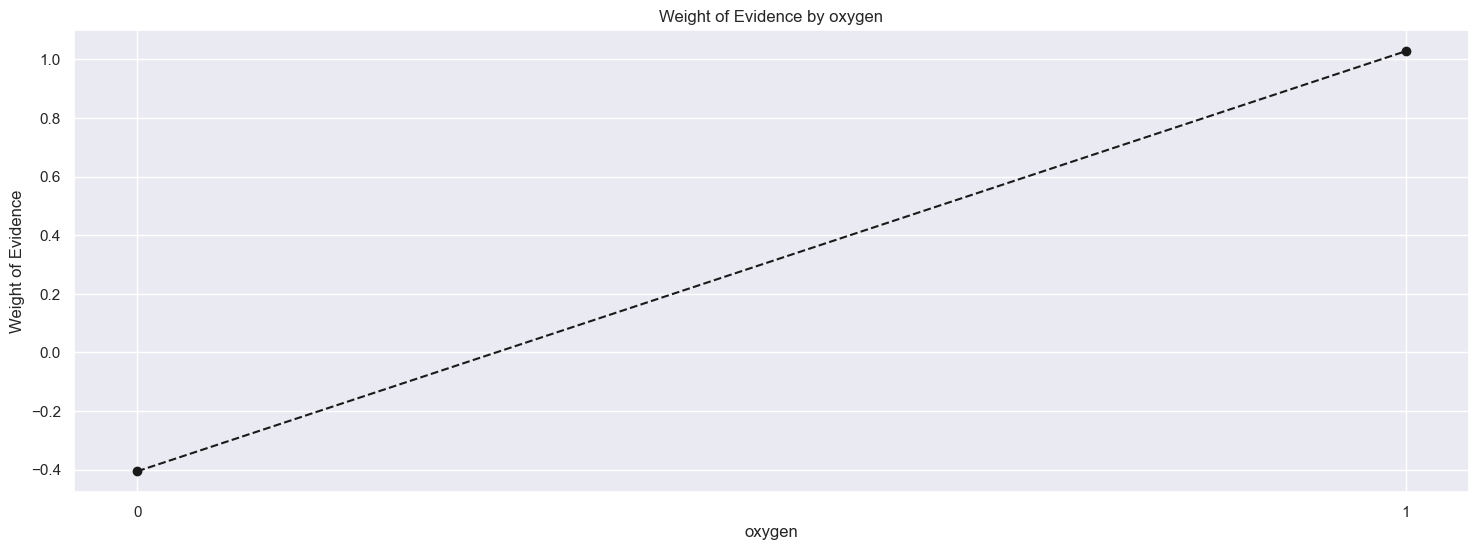

In [145]:
plot_by_woe(df_temp)

The variable has suspiciously strong predictive power.

In [146]:
df_temp = woe_discrete(df_d_inputs_prepr, 'conscious', df_d_targets_prepr)
df_temp

conscious  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0          1    259   0.111969    0.931655    29.0    230.0     0.743590   
1          2      4   0.250000    0.014388     1.0      3.0     0.025641   
2          3      5   0.600000    0.017986     3.0      2.0     0.076923   
3          4     10   0.600000    0.035971     6.0      4.0     0.153846   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.962343 -0.257882             NaN       NaN  0.522001  
1      0.012552  0.714290        0.138031  0.972171  0.522001  
2      0.008368  2.218367        0.350000  1.504077  0.522001  
3      0.016736  2.218367        0.000000  0.000000  0.522001

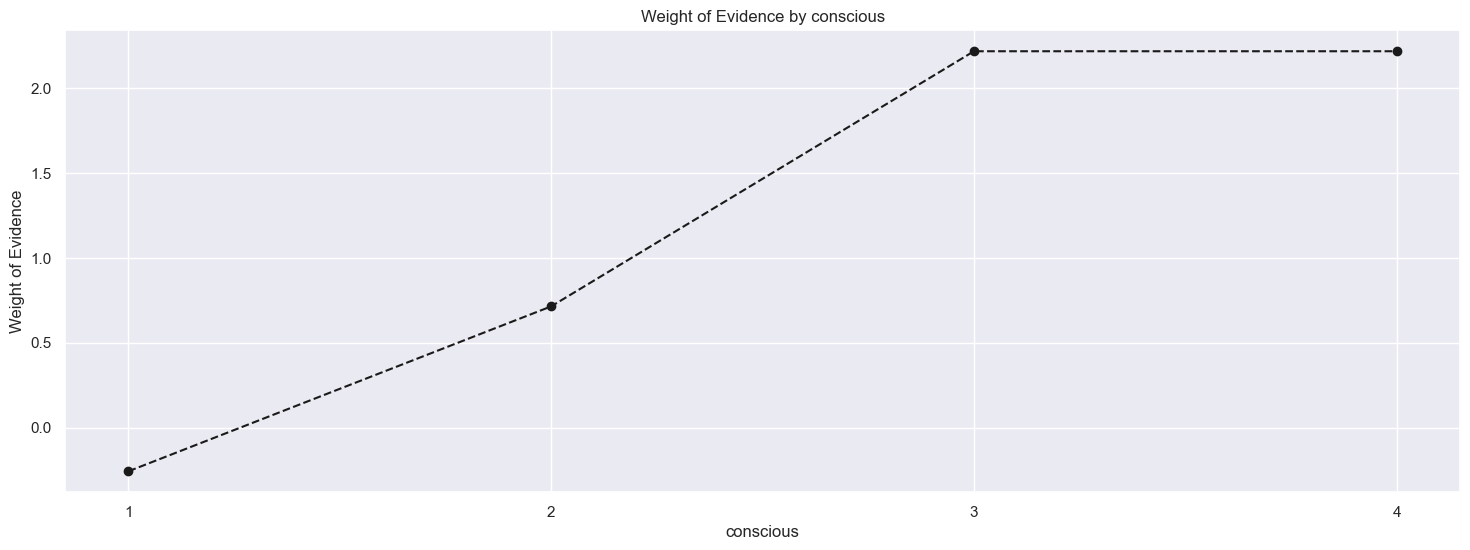

In [147]:
plot_by_woe(df_temp)

In [148]:
df_temp = woe_discrete(df_di_inputs_prepr, 'conscious', df_di_targets_prepr)
df_temp

conscious  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0          2      4   0.250000    0.014388     1.0      3.0       0.0125   
1          1    259   0.262548    0.931655    68.0    191.0       0.8500   
2          4     10   0.700000    0.035971     7.0      3.0       0.0875   
3          3      5   0.800000    0.017986     4.0      1.0       0.0500   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE       IV  
0      0.015152 -0.192372             NaN       NaN  0.24493  
1      0.964646 -0.126525        0.012548  0.065847  0.24493  
2      0.015152  1.753538        0.437452  1.880064  0.24493  
3      0.005051  2.292535        0.100000  0.538997  0.24493

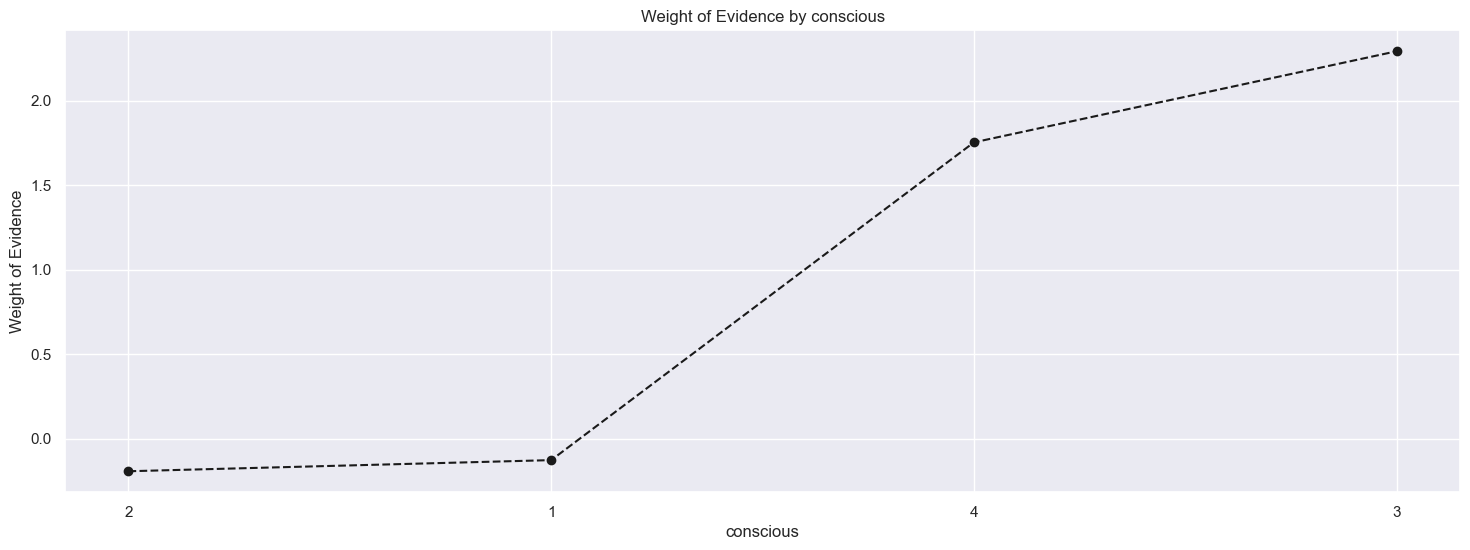

In [149]:
plot_by_woe(df_temp)

Maybe making categories 3 and 4 into one category, or even together with category 2 would make sense only by seeing the table and frequencies. Otherwise, it doesn't make sense because category 4 is complete unconsciosness, category 2 is reactive to calling, and 3 is reactive to pain.

In [150]:
df_d_inputs_prepr["conscious:3_4"] = sum([df_d_inputs_prepr['conscious:3'], df_d_inputs_prepr['conscious:4']])

## Continuous variables

In [151]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_dead']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_dead'] = df['prop_dead'] * df['n_obs']
    df['n_alive'] = (1 - df['prop_dead']) * df['n_obs']
    df['prop_n_dead'] = df['n_dead'] / df['n_dead'].sum()
    df['prop_n_alive'] = df['n_alive'] / df['n_alive'].sum()
    df['WoE'] = np.log(df['prop_n_dead'] / df['prop_n_alive'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_dead'] = df['prop_dead'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_dead'] - df['prop_n_alive']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [152]:
df_d_inputs_prepr['age_factor'] = pd.cut(df_d_inputs_prepr['age'], [0, 60, 70, 80, 90, 100])

In [153]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "age_factor", df_d_targets_prepr)
df_temp

age_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0    (0, 60]     62   0.032258    0.223022     2.0     60.0     0.051282   
1   (60, 70]     56   0.071429    0.201439     4.0     52.0     0.102564   
2   (70, 80]     88   0.204545    0.316547    18.0     70.0     0.461538   
3   (80, 90]     63   0.174603    0.226619    11.0     52.0     0.282051   
4  (90, 100]      9   0.444444    0.032374     4.0      5.0     0.102564   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.251046 -1.588295             NaN       NaN  0.627005  
1      0.217573 -0.752047        0.039171  0.836248  0.627005  
2      0.292887  0.454778        0.133117  1.206826  0.627005  
3      0.217573  0.259553        0.029942  0.195225  0.627005  
4      0.020921  1.589758        0.269841  1.330205  0.627005

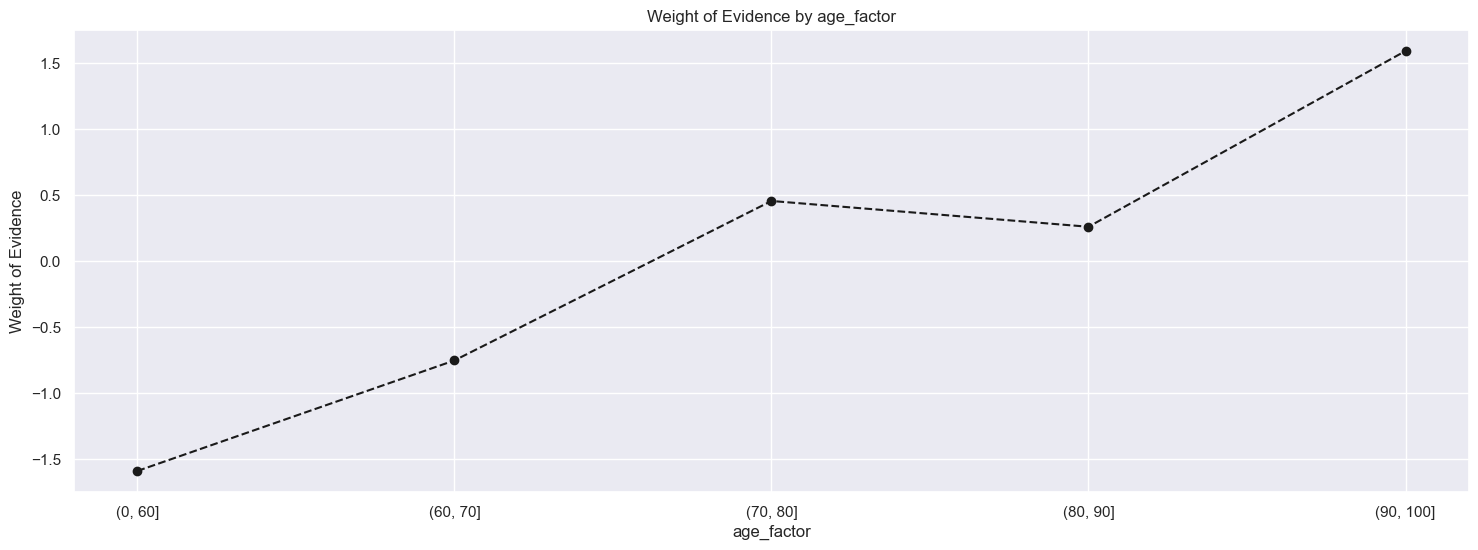

In [154]:
plot_by_woe(df_temp)

In [155]:
df_di_inputs_prepr['age_factor'] = pd.cut(df_di_inputs_prepr['age'], [0, 60, 70, 80, 90, 100])

In [156]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "age_factor", df_di_targets_prepr)
df_temp

age_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0    (0, 60]     62   0.177419    0.223022    11.0     51.0       0.1375   
1   (60, 70]     56   0.214286    0.201439    12.0     44.0       0.1500   
2   (70, 80]     88   0.352273    0.316547    31.0     57.0       0.3875   
3   (80, 90]     63   0.333333    0.226619    21.0     42.0       0.2625   
4  (90, 100]      9   0.555556    0.032374     5.0      4.0       0.0625   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.257576 -0.627690             NaN       NaN  0.191868  
1      0.222222 -0.393043        0.036866  0.234647  0.191868  
2      0.287879  0.297176        0.137987  0.690219  0.191868  
3      0.212121  0.213093        0.018939  0.084083  0.191868  
4      0.020202  1.129384        0.222222  0.916291  0.191868

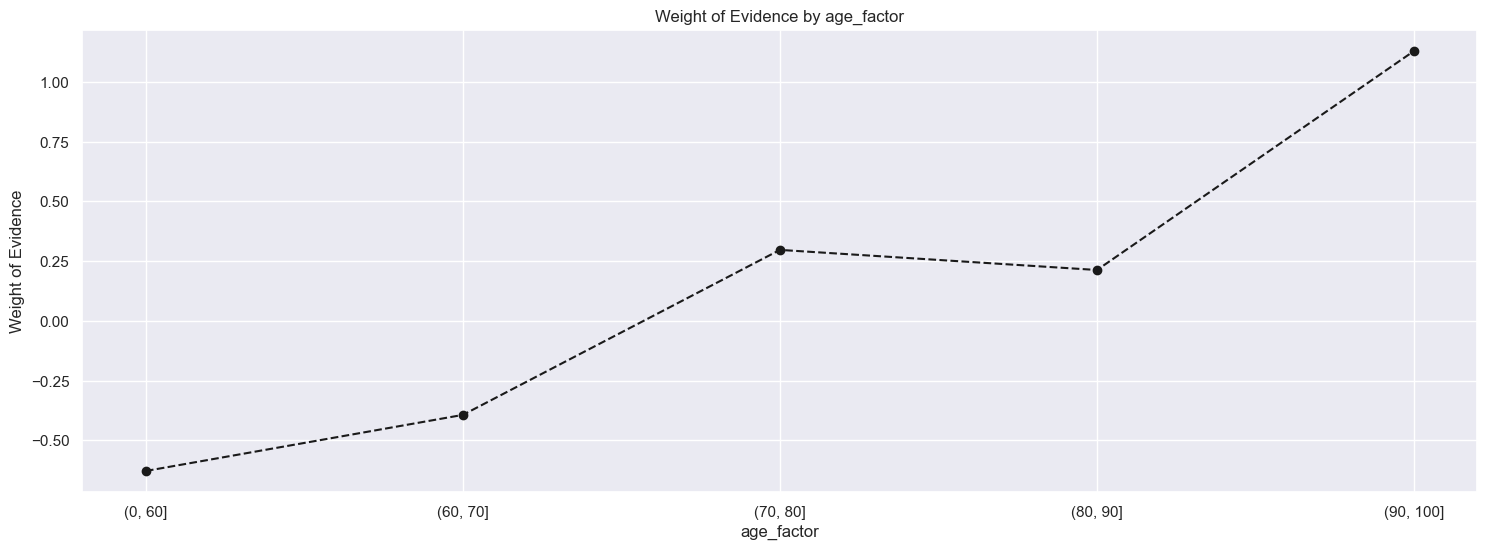

In [157]:
plot_by_woe(df_temp)

In [158]:
df_d_inputs_prepr['respiration_factor'] = pd.cut(df_d_inputs_prepr['respiration'], [0, 20, 24])

In [159]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "respiration_factor", df_d_targets_prepr)
df_temp

respiration_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0            (0, 20]    270    0.12963    0.971223    35.0    235.0   
1           (20, 24]      8    0.50000    0.028777     4.0      4.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0     0.897436      0.983264 -0.091336             NaN       NaN  0.163436  
1     0.102564      0.016736  1.812902         0.37037  1.904237  0.163436

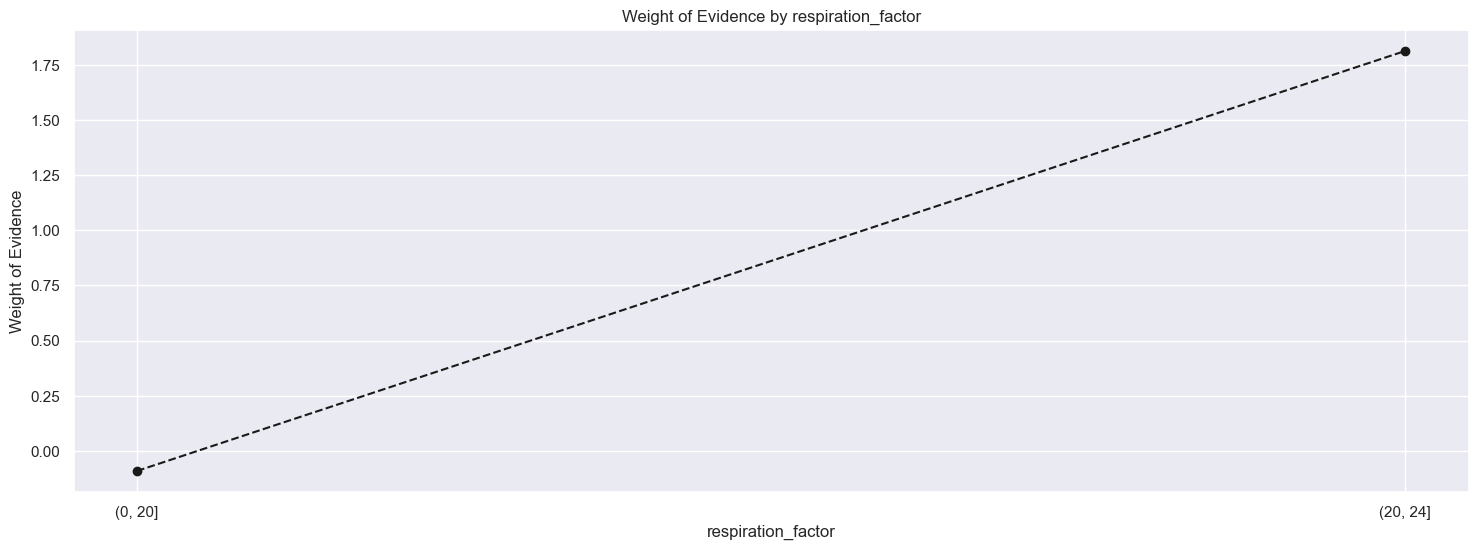

In [160]:
plot_by_woe(df_temp)

In [161]:
df_di_inputs_prepr['respiration_factor'] = pd.cut(df_di_inputs_prepr['respiration'], [0, 20, 24])

In [162]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "respiration_factor", df_di_targets_prepr)
df_temp

respiration_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0            (0, 20]    270   0.277778    0.971223    75.0    195.0   
1           (20, 24]      8   0.625000    0.028777     5.0      3.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0       0.9375      0.984848 -0.049271             NaN       NaN  0.069429  
1       0.0625      0.015152  1.417066        0.347222  1.466337  0.069429

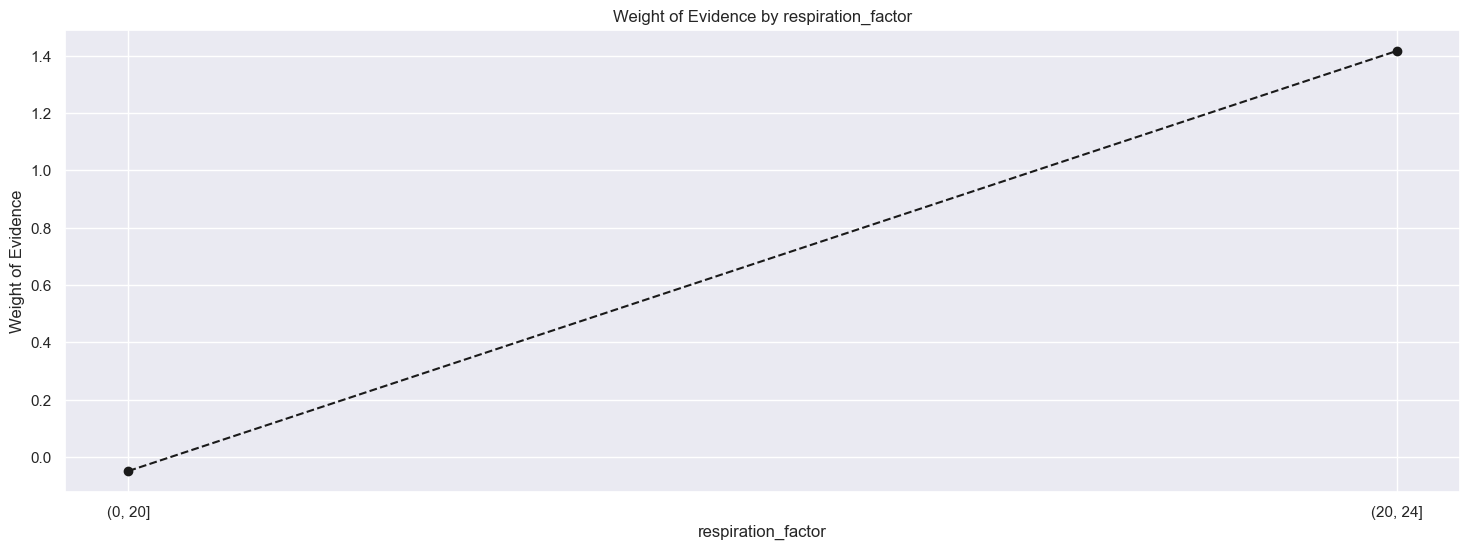

In [163]:
plot_by_woe(df_temp)

In [164]:
df_d_inputs_prepr['spo2_factor'] = pd.cut(df_d_inputs_prepr['spo2'], [0, 89, 95, 100])

In [165]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "spo2_factor", df_d_targets_prepr)
df_temp

spo2_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0     (0, 89]     44   0.363636    0.158273    16.0     28.0     0.410256   
1    (89, 95]     63   0.158730    0.226619    10.0     53.0     0.256410   
2   (95, 100]    171   0.076023    0.615108    13.0    158.0     0.333333   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.117155  1.253286             NaN       NaN  0.596799  
1      0.221757  0.145195        0.204906  1.108091  0.596799  
2      0.661088 -0.684744        0.082707  0.829939  0.596799

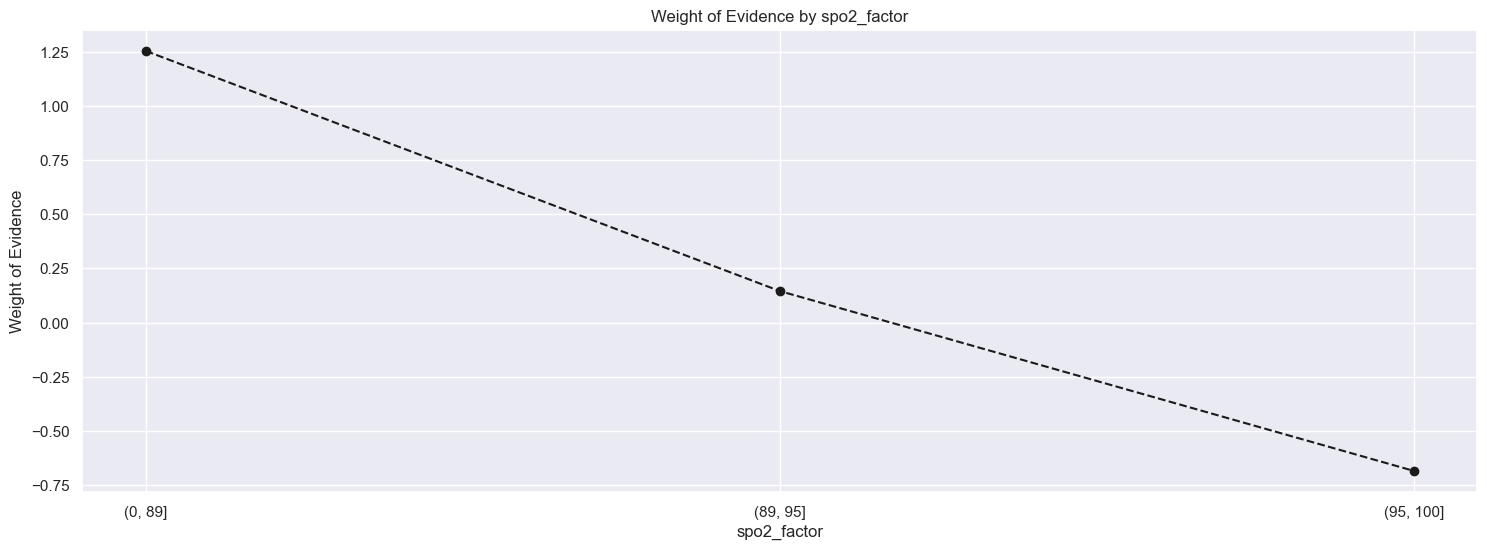

In [166]:
plot_by_woe(df_temp)

In [167]:
df_di_inputs_prepr['spo2_factor'] = pd.cut(df_di_inputs_prepr['spo2'], [0, 89, 100])

In [168]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "spo2_factor", df_di_targets_prepr)
df_temp

spo2_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0     (0, 89]     44   0.568182    0.158273    25.0     19.0       0.3125   
1   (89, 100]    234   0.235043    0.841727    55.0    179.0       0.6875   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0       0.09596  1.180677             NaN       NaN  0.314956  
1       0.90404 -0.273812        0.333139  1.454489  0.314956

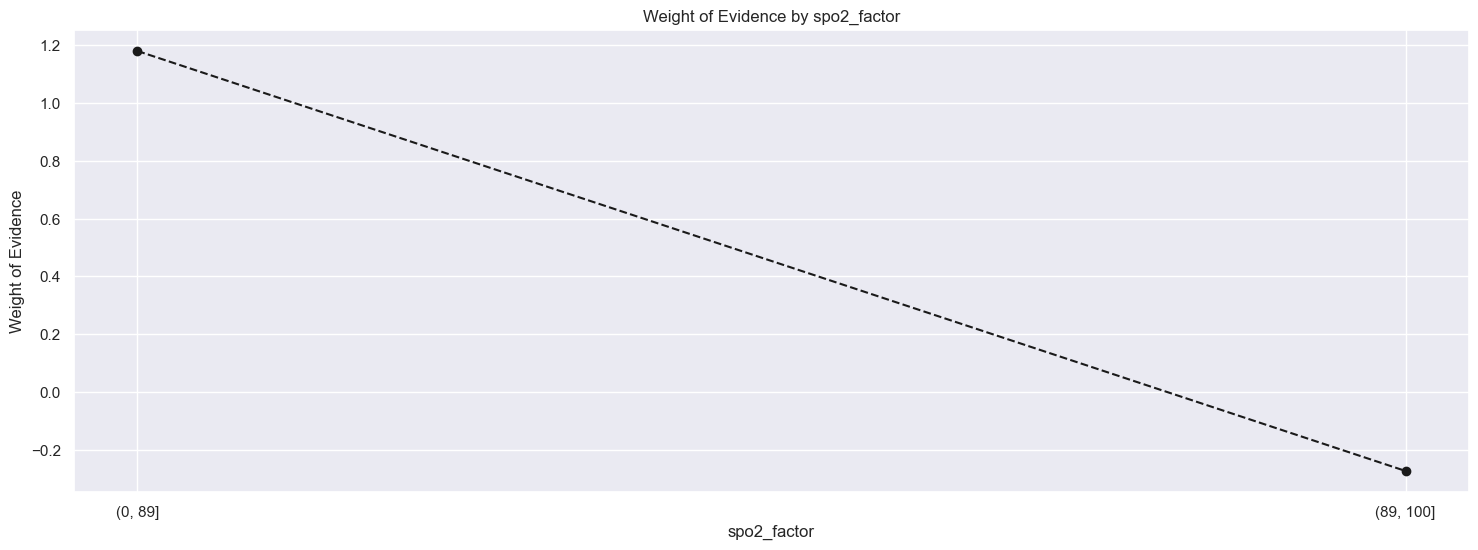

In [169]:
plot_by_woe(df_temp)

In [170]:
df_d_inputs_prepr['blood_pressure_factor'] = pd.cut(df_d_inputs_prepr['blood_pressure'], [0, 120, 140, 160, 250])

In [171]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "blood_pressure_factor", df_d_targets_prepr)
df_temp

blood_pressure_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0              (0, 120]    102   0.235294    0.366906    24.0     78.0   
1            (120, 140]     78   0.102564    0.280576     8.0     70.0   
2            (140, 160]     57   0.087719    0.205036     5.0     52.0   
3            (160, 250]     41   0.048780    0.147482     2.0     39.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0     0.615385      0.326360  0.634247             NaN       NaN  0.391359  
1     0.205128      0.292887 -0.356152        0.132730  0.990399  0.391359  
2     0.128205      0.217573 -0.528904        0.014845  0.172752  0.391359  
3     0.051282      0.163180 -1.157513        0.038939  0.628609  0.391359

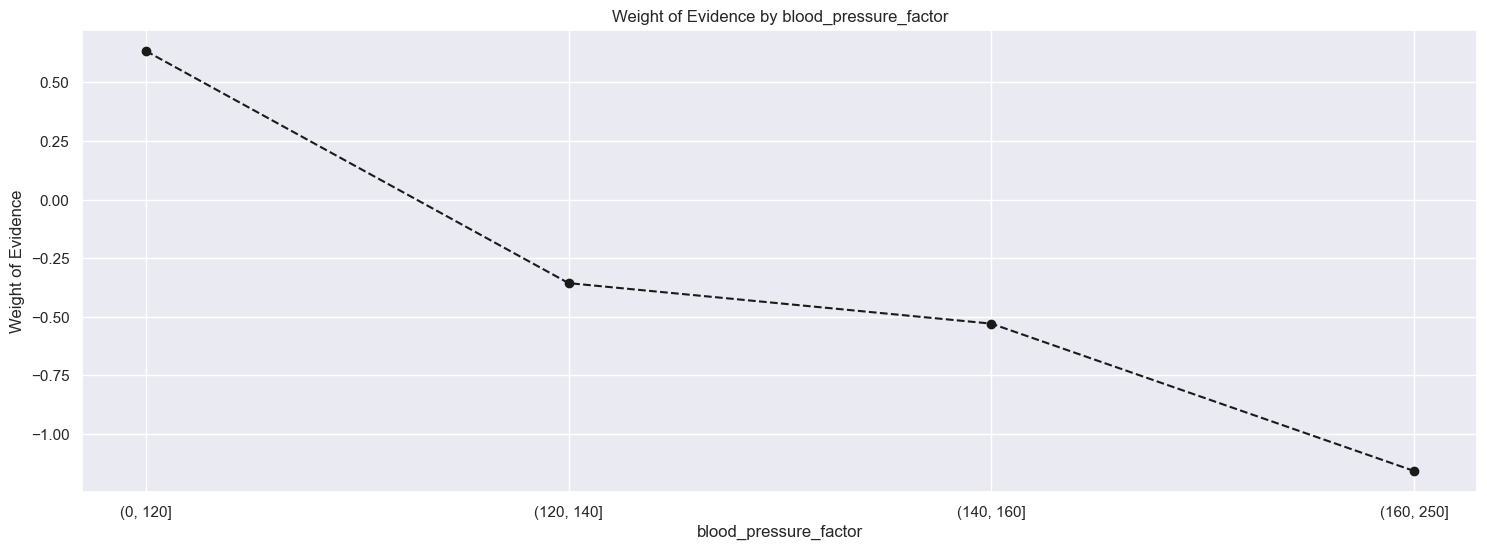

In [172]:
plot_by_woe(df_temp)

In [173]:
df_di_inputs_prepr['blood_pressure_factor'] = pd.cut(df_di_inputs_prepr['blood_pressure'], [0, 120, 150, 250])

In [174]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "blood_pressure_factor", df_di_targets_prepr)
df_temp

blood_pressure_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0              (0, 120]    102   0.343137    0.366906    35.0     67.0   
1            (120, 150]    110   0.263636    0.395683    29.0     81.0   
2            (150, 250]     66   0.242424    0.237410    16.0     50.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0       0.4375      0.338384  0.256896             NaN       NaN  0.043345  
1       0.3625      0.409091 -0.120913        0.079501  0.377809  0.043345  
2       0.2000      0.252525 -0.233194        0.021212  0.112281  0.043345

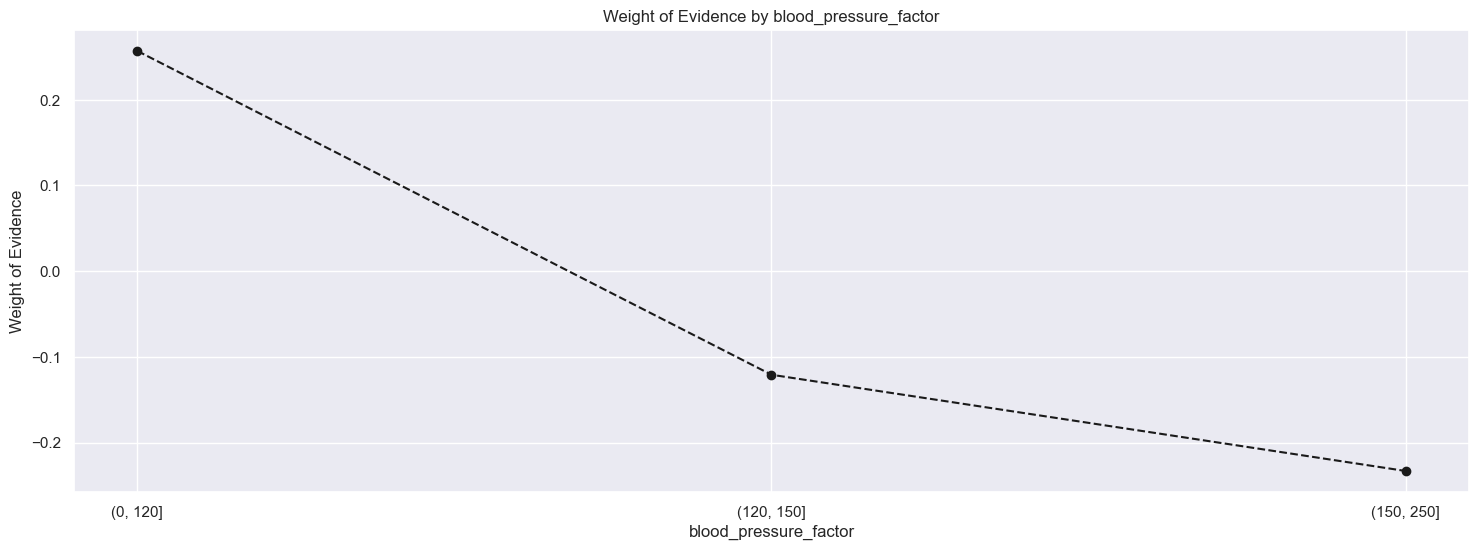

In [175]:
plot_by_woe(df_temp)

In [176]:
df_d_inputs_prepr['puls_factor'] = pd.cut(df_d_inputs_prepr['puls'], [0, 75, 85, 105, 200])

In [177]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "puls_factor", df_d_targets_prepr)
df_temp

puls_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0     (0, 75]     74   0.148649    0.266187    11.0     63.0     0.282051   
1    (75, 85]     56   0.071429    0.201439     4.0     52.0     0.102564   
2   (85, 105]     90   0.122222    0.323741    11.0     79.0     0.282051   
3  (105, 200]     58   0.224138    0.208633    13.0     45.0     0.333333   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.263598  0.067662             NaN       NaN  0.178285  
1      0.217573 -0.752047        0.077220  0.819710  0.178285  
2      0.330544 -0.158651        0.050794  0.593397  0.178285  
3      0.188285  0.571189        0.101916  0.729839  0.178285

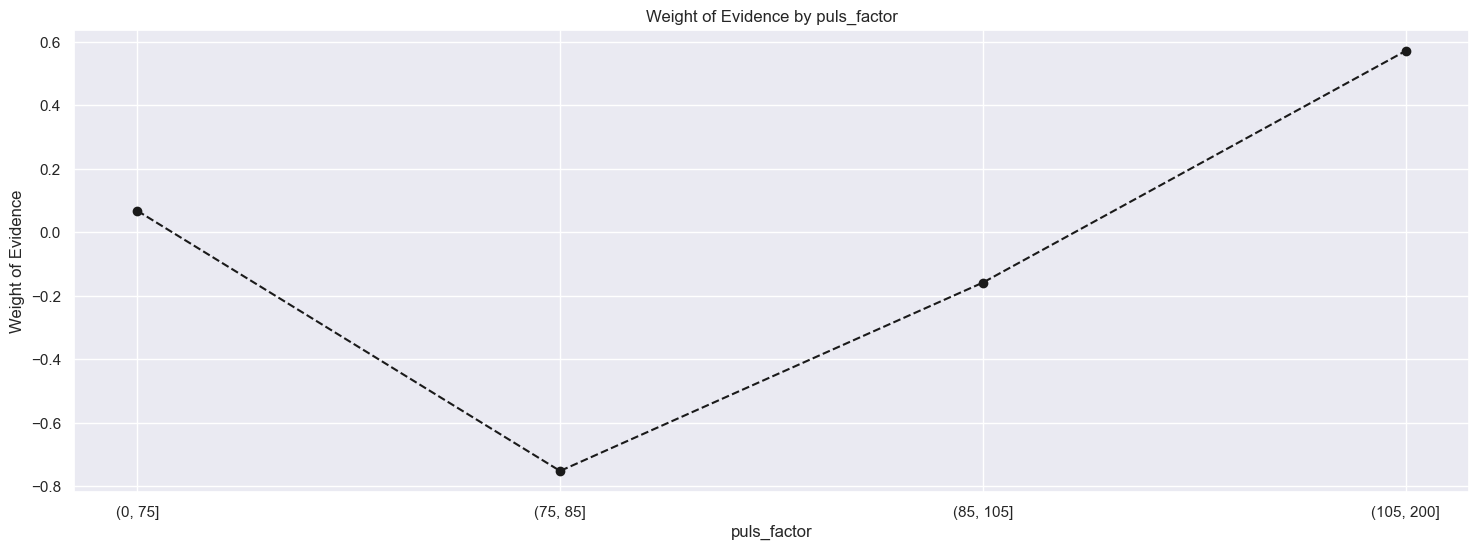

In [178]:
plot_by_woe(df_temp)

In [317]:
df_d_inputs_prepr['puls_factor'] = pd.cut(df_d_inputs_prepr['puls_abs'], [-1, 10, 20, 40, 130])

In [318]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "puls_factor", df_d_targets_prepr)
df_temp

puls_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0    (-1, 10]    117   0.102564    0.420863    12.0    105.0     0.307692   
1    (10, 20]     66   0.121212    0.237410     8.0     58.0     0.205128   
2    (20, 40]     60   0.183333    0.215827    11.0     49.0     0.282051   
3   (40, 130]     35   0.228571    0.125899     8.0     27.0     0.205128   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.439331 -0.356152             NaN       NaN  0.132739  
1      0.242678 -0.168100        0.018648  0.188052  0.132739  
2      0.205021  0.318977        0.062121  0.487076  0.132739  
3      0.112971  0.596507        0.045238  0.277530  0.132739

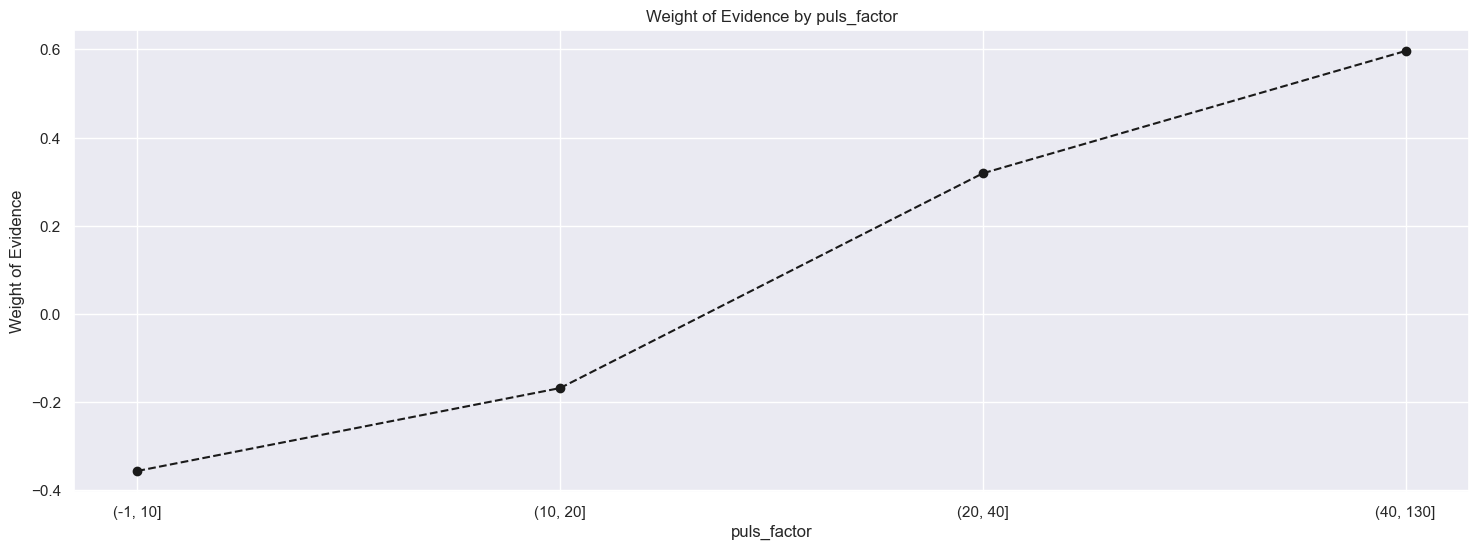

In [319]:
plot_by_woe(df_temp)

In [182]:
df_di_inputs_prepr['puls_factor'] = pd.cut(df_di_inputs_prepr['puls'], [0, 75, 85, 105, 200])

In [183]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "puls_factor", df_di_targets_prepr)
df_temp

puls_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0     (0, 75]     74   0.283784    0.266187    21.0     53.0       0.2625   
1    (75, 85]     56   0.142857    0.201439     8.0     48.0       0.1000   
2   (85, 105]     90   0.300000    0.323741    27.0     63.0       0.3375   
3  (105, 200]     58   0.413793    0.208633    24.0     34.0       0.3000   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.267677 -0.019529             NaN       NaN  0.198932  
1      0.242424 -0.885519        0.140927  0.865990  0.198932  
2      0.318182  0.058943        0.157143  0.944462  0.198932  
3      0.171717  0.557934        0.113793  0.498991  0.198932

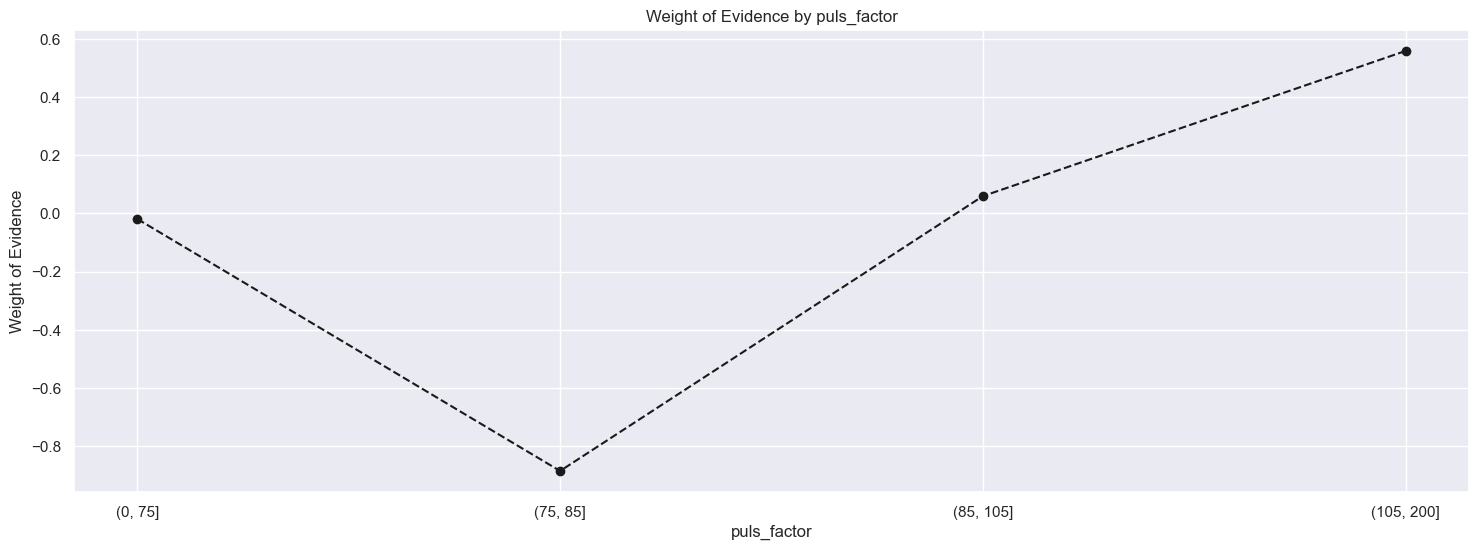

In [184]:
plot_by_woe(df_temp)

In [320]:
df_di_inputs_prepr['puls_factor'] = pd.cut(df_di_inputs_prepr['puls_abs'], [-1, 10, 20, 40, 130])

In [321]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "puls_factor", df_di_targets_prepr)
df_temp

puls_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  prop_n_dead  \
0    (-1, 10]    117   0.188034    0.420863    22.0     95.0       0.2750   
1    (10, 20]     66   0.348485    0.237410    23.0     43.0       0.2875   
2    (20, 40]     60   0.333333    0.215827    20.0     40.0       0.2500   
3   (40, 130]     35   0.428571    0.125899    15.0     20.0       0.1875   

   prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0      0.479798 -0.556594             NaN       NaN  0.197442  
1      0.217172  0.280534        0.160451  0.837129  0.197442  
2      0.202020  0.213093        0.015152  0.067441  0.197442  
3      0.101010  0.618558        0.095238  0.405465  0.197442

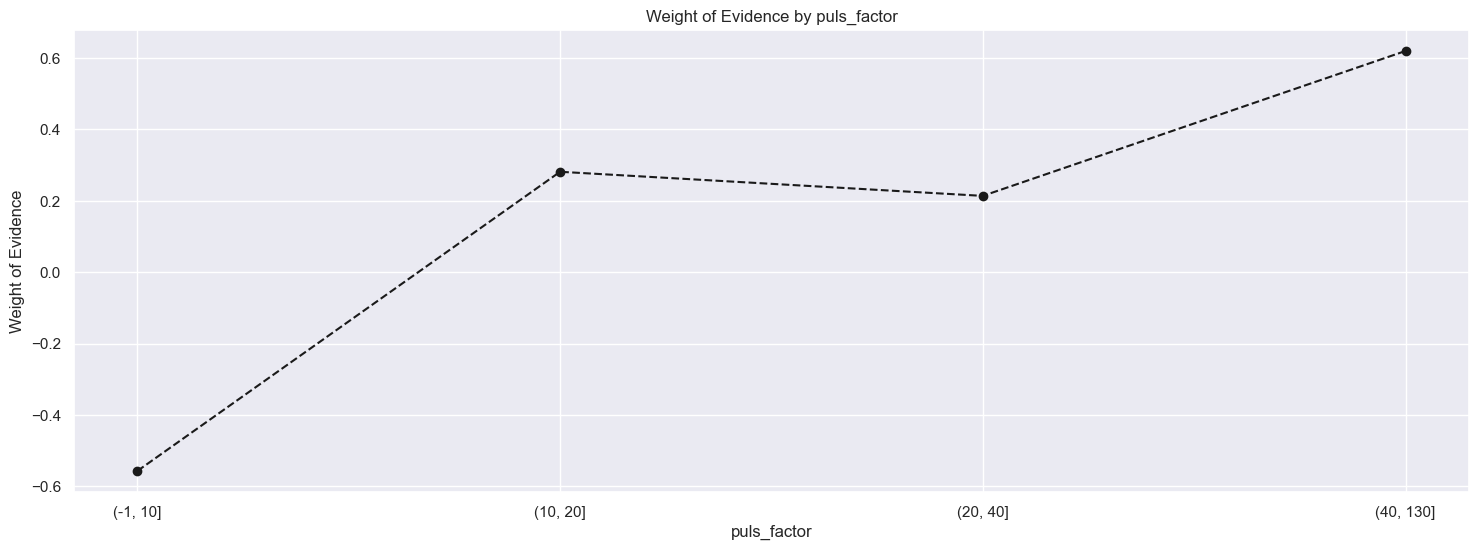

In [322]:
plot_by_woe(df_temp)

In [188]:
df_d_inputs_prepr['temperature_factor'] = pd.cut(df_d_inputs_prepr['temperature'], [0, 36.5, 38, 39.5])

In [189]:
df_temp = woe_ordered_continuous(df_d_inputs_prepr, "temperature_factor", df_d_targets_prepr)
df_temp

temperature_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0        (0.0, 36.5]    241   0.128631    0.866906    31.0    210.0   
1       (36.5, 38.0]     31   0.161290    0.111511     5.0     26.0   
2       (38.0, 39.5]      6   0.500000    0.021583     3.0      3.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0     0.794872      0.878661 -0.100218             NaN       NaN  0.128284  
1     0.128205      0.108787  0.164243         0.03266  0.264462  0.128284  
2     0.076923      0.012552  1.812902         0.33871  1.648659  0.128284

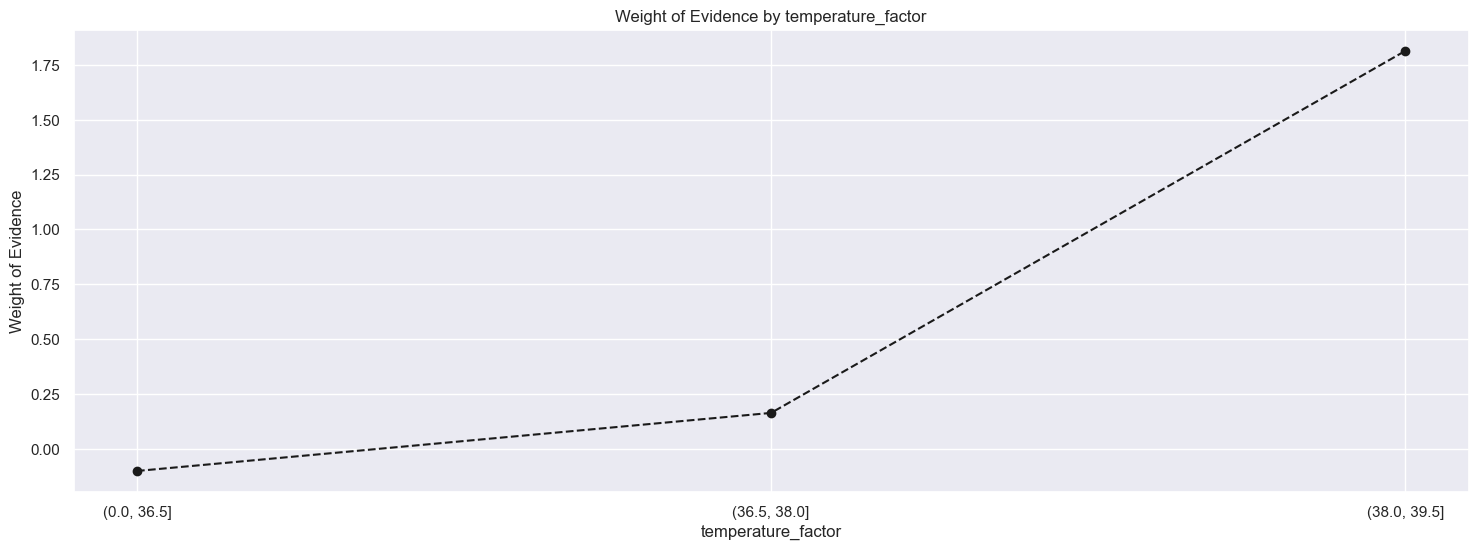

In [190]:
plot_by_woe(df_temp)

In [191]:
df_di_inputs_prepr['temperature_factor'] = pd.cut(df_di_inputs_prepr['temperature'], [0, 36.5, 37, 38, 39.5])

In [192]:
df_temp = woe_ordered_continuous(df_di_inputs_prepr, "temperature_factor", df_di_targets_prepr)
df_temp

temperature_factor  n_obs  prop_dead  prop_n_obs  n_dead  n_alive  \
0        (0.0, 36.5]    241   0.282158    0.866906    68.0    173.0   
1       (36.5, 37.0]     22   0.272727    0.079137     6.0     16.0   
2       (37.0, 38.0]      9   0.222222    0.032374     2.0      7.0   
3       (38.0, 39.5]      6   0.666667    0.021583     4.0      2.0   

   prop_n_dead  prop_n_alive       WoE  diff_prop_dead  diff_WoE        IV  
0        0.850      0.873737 -0.027543             NaN       NaN  0.068489  
1        0.075      0.080808 -0.074589        0.009430  0.047045  0.068489  
2        0.025      0.035354 -0.346523        0.050505  0.271934  0.068489  
3        0.050      0.010101  1.599388        0.444444  1.945910  0.068489

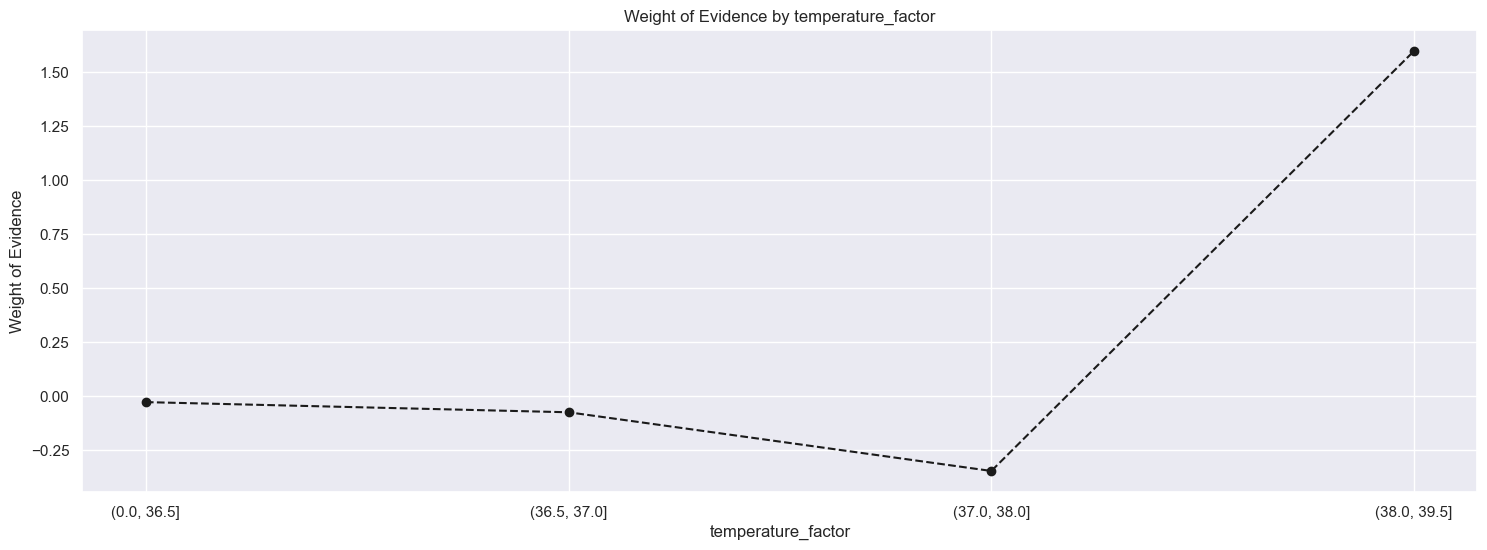

In [193]:
plot_by_woe(df_temp)

Weak predictive power in both cases!

In [194]:
df_d_inputs_prepr.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [195]:
df_d_inputs_prepr['age_factor'][1] == pd.Interval(0, 60, closed='right')

True

In [196]:
# Categories:
df_d_inputs_prepr['age:0-60'] = np.where(df_d_inputs_prepr['age_factor']==pd.Interval(0, 60, closed='right'), 1, 0)
df_d_inputs_prepr['age:61-70'] = np.where(df_d_inputs_prepr['age_factor']==pd.Interval(60, 70, closed='right'), 1, 0)
df_d_inputs_prepr['age:71-80'] = np.where(df_d_inputs_prepr['age_factor']==pd.Interval(70, 80, closed='right'), 1, 0)
df_d_inputs_prepr['age:81-90'] = np.where(df_d_inputs_prepr['age_factor']==pd.Interval(80, 90, closed='right'), 1, 0)
df_d_inputs_prepr['age:91-100'] = np.where(df_d_inputs_prepr['age_factor']==pd.Interval(90, 100, closed='right'), 1, 0)

In [197]:
# Categories:
df_d_inputs_prepr['respiration:<=20'] = np.where(df_d_inputs_prepr['respiration_factor']==pd.Interval(0, 20, closed='right'), 1, 0)
df_d_inputs_prepr['respiration:>=21'] = np.where(df_d_inputs_prepr['respiration_factor']==pd.Interval(20, 24, closed='right'), 1, 0)

In [198]:
# Categories:
df_d_inputs_prepr['spo2:0-89'] = np.where(df_d_inputs_prepr['spo2_factor']==pd.Interval(0, 89, closed='right'), 1, 0)
df_d_inputs_prepr['spo2:90-95'] = np.where(df_d_inputs_prepr['spo2_factor']==pd.Interval(89, 95, closed='right'), 1, 0)
df_d_inputs_prepr['spo2:96-100'] = np.where(df_d_inputs_prepr['spo2_factor']==pd.Interval(95, 100, closed='right'), 1, 0)

In [199]:
# Categories:
df_d_inputs_prepr['blood_pressure:0-120'] = np.where(df_d_inputs_prepr['blood_pressure_factor']==pd.Interval(0, 120, closed='right'), 1, 0)
df_d_inputs_prepr['blood_pressure:121-140'] = np.where(df_d_inputs_prepr['blood_pressure_factor']==pd.Interval(120, 140, closed='right'), 1, 0)
df_d_inputs_prepr['blood_pressure:141-160'] = np.where(df_d_inputs_prepr['blood_pressure_factor']==pd.Interval(140, 160, closed='right'), 1, 0)
df_d_inputs_prepr['blood_pressure:161-250'] = np.where(df_d_inputs_prepr['blood_pressure_factor']==pd.Interval(160, 250, closed='right'), 1, 0)

In [200]:
# Categories:
df_d_inputs_prepr['puls:70-90'] = np.where(df_d_inputs_prepr['puls_factor']==pd.Interval(0, 10, closed='right'), 1, 0)
df_d_inputs_prepr['puls:60-70or90-100'] = np.where(df_d_inputs_prepr['puls_factor']==pd.Interval(10, 20, closed='right'), 1, 0)
df_d_inputs_prepr['puls:40-60or100-120'] = np.where(df_d_inputs_prepr['puls_factor']==pd.Interval(20, 40, closed='right'), 1, 0)
df_d_inputs_prepr['puls:0-40or120-200'] = np.where(df_d_inputs_prepr['puls_factor']==pd.Interval(40, 130, closed='right'), 1, 0)


In [201]:
# Categories:
df_d_inputs_prepr['temperature:0-36.5'] = np.where(df_d_inputs_prepr['temperature_factor']==pd.Interval(0, 36.5, closed='right'), 1, 0)
df_d_inputs_prepr['temperature:36.6-38'] = np.where(df_d_inputs_prepr['temperature_factor']==pd.Interval(36.5, 38, closed='right'), 1, 0)
df_d_inputs_prepr['temperature:38.1-39.5'] = np.where(df_d_inputs_prepr['temperature_factor']==pd.Interval(38, 39.5, closed='right'), 1, 0)


In [202]:
df_d_inputs_prepr.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [203]:
pd.set_option('display.max_columns', None)

In [204]:
df_d_inputs_prepr.head()

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  \
0   1     1       1  1936          6       1     1.0      1.0    0     0   
1   2     2       1  1972         10       1     3.0      4.0    0     0   
2   3     2       1  1946          9       4     5.0      1.0    1     0   
3   4     2       1  1927         11       6     1.0      2.0    0     0   
4   5     2       1  1934         10       3     3.0      1.0    0     0   

   RIZIK_POJEDINACNI  RIZIK_UKUPNI  RESPIRACIJE_1  RESP_BOD_1  SPO2_1  \
0                  1             2             18           0    98.0   
1                  1             2             19           0     NaN   
2                  1             2             16           0    97.0   
3                  1             2             14           0    93.0   
4                  0             2             18           0     NaN   

   SPO2_BOD_1  SPO22_1  SPO22_BOD_1  KISIK_1  KISIK_BOD_1  TLAK_1  TLAK_BOD_1  \
0         0.0      NaN          NaN        0            0     136           0   
1         NaN     90.0          0.0        1            2     106           1   
2         0.0      NaN          NaN        0            0     219           0   
3         2.0      NaN          NaN        1            2      99           2   
4         NaN     92.0          0.0        0            0     130           0   

   PULS_1  PULS_BOD_1  SVIJEST_1  SVIJEST_BOD_1  TEMPERATURA_1  TEMP_BOD_1  \
0      56           0          1              0           36.1           0   
1     100           1          1              0           36.1           0   
2      42           1          1              0           36.1           0   
3      53           0          1              0           36.1           0   
4      70           0          1              0           36.1           0   

   UKUPNI_BODOVI_1  RESPIRACIJE_2  RESP_BOD_2  SPO2_2  SPO2_BOD_2  SPO22_2  \
0                0             16           0    98.0         0.0      NaN   
1                4             22           2     NaN         NaN     88.0   
2                1             15           0    99.0         0.0      NaN   
3                6             17           0    91.0         3.0      NaN   
4                0             21           2     NaN         NaN     85.0   

   SPO22_BOD_2  KISIK_2  KISIK_BOD_2  TLAK_2  TLAK_BOD_2  PULS_2  PULS_BOD_2  \
0          NaN        0            0     165           0      43           1   
1          0.0        1            2     130           0      98           0   
2          NaN        0            0     204           0      40           3   
3          NaN        1            2     136           0      63           0   
4          0.0        1            2     140           0      68           0   

   SVIJEST_2  SVIJEST_BOD_2  TEMPERATURA_2  TEMP_BOD_2  UKUPNI_BODOVI_2  \
0          1              0           36.1           0              1.0   
1          1              0           36.1           0              5.0   
2          1              0           36.1           0              3.0   
3          1              0           36.1           0              5.0   
4          1              0           36.1           0              6.0   

   RESPIRACIJE_3  RESP_BOD_3  SPO2_3  SPO2_BOD_3  SPO22_3  SPO22_BOD_3  \
0           16.0         0.0    93.0         2.0      NaN          NaN   
1           20.0         0.0     NaN         NaN     87.0          1.0   
2           16.0         0.0    96.0         0.0      NaN          NaN   
3           15.0         0.0    97.0         0.0      NaN          NaN   
4           21.0         2.0     NaN         NaN     91.0          0.0   

   KISIK_3  KISIK_BOD_3  TLAK_3  TLAK_BOD_3  PULS_3  PULS_BOD_3  SVIJEST_3  \
0      0.0          0.0   156.0         0.0    31.0         3.0        1.0   
1      1.0          2.0   140.0         0.0    95.0         1.0        1.0   
2      0.0          0.0   191.0         0.0    38.0         3.0        

In [205]:
df_di_inputs_prepr.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [206]:
# Categories:
df_di_inputs_prepr['age:0-60'] = np.where(df_di_inputs_prepr['age_factor']==pd.Interval(0, 60, closed='right'), 1, 0)
df_di_inputs_prepr['age:61-70'] = np.where(df_di_inputs_prepr['age_factor']==pd.Interval(60, 70, closed='right'), 1, 0)
df_di_inputs_prepr['age:71-80'] = np.where(df_di_inputs_prepr['age_factor']==pd.Interval(70, 80, closed='right'), 1, 0)
df_di_inputs_prepr['age:81-90'] = np.where(df_di_inputs_prepr['age_factor']==pd.Interval(80, 90, closed='right'), 1, 0)
df_di_inputs_prepr['age:91-100'] = np.where(df_di_inputs_prepr['age_factor']==pd.Interval(90, 100, closed='right'), 1, 0)

In [207]:
# Categories:
df_di_inputs_prepr['spo2:0-89'] = np.where(df_di_inputs_prepr['spo2_factor']==pd.Interval(0, 89, closed='right'), 1, 0)
df_di_inputs_prepr['spo2:90-100'] = np.where(df_di_inputs_prepr['spo2_factor']==pd.Interval(89, 100, closed='right'), 1, 0)

In [208]:
# Categories:
df_di_inputs_prepr['puls:70-90'] = np.where(df_di_inputs_prepr['puls_factor']==pd.Interval(0, 10, closed='right'), 1, 0)
df_di_inputs_prepr['puls:60-70or90-100'] = np.where(df_di_inputs_prepr['puls_factor']==pd.Interval(10, 20, closed='right'), 1, 0)
df_di_inputs_prepr['puls:40-60or100-120'] = np.where(df_di_inputs_prepr['puls_factor']==pd.Interval(20, 40, closed='right'), 1, 0)
df_di_inputs_prepr['puls:0-40or120-200'] = np.where(df_di_inputs_prepr['puls_factor']==pd.Interval(40, 130, closed='right'), 1, 0)


In [209]:
df_di_inputs_prepr.columns.values

array(['RB', 'SPOL', 'MJESTO', 'DOB', 'RAZLOG/dg', 'OTPUST', '2 DANA',
       '30 DANA', 'ICU', 'SMRT', 'RIZIK_POJEDINACNI', 'RIZIK_UKUPNI',
       'RESPIRACIJE_1', 'RESP_BOD_1', 'SPO2_1', 'SPO2_BOD_1', 'SPO22_1',
       'SPO22_BOD_1', 'KISIK_1', 'KISIK_BOD_1', 'TLAK_1', 'TLAK_BOD_1',
       'PULS_1', 'PULS_BOD_1', 'SVIJEST_1', 'SVIJEST_BOD_1',
       'TEMPERATURA_1', 'TEMP_BOD_1', 'UKUPNI_BODOVI_1', 'RESPIRACIJE_2',
       'RESP_BOD_2', 'SPO2_2', 'SPO2_BOD_2', 'SPO22_2', 'SPO22_BOD_2',
       'KISIK_2', 'KISIK_BOD_2', 'TLAK_2', 'TLAK_BOD_2', 'PULS_2',
       'PULS_BOD_2', 'SVIJEST_2', 'SVIJEST_BOD_2', 'TEMPERATURA_2',
       'TEMP_BOD_2', 'UKUPNI_BODOVI_2', 'RESPIRACIJE_3', 'RESP_BOD_3',
       'SPO2_3', 'SPO2_BOD_3', 'SPO22_3', 'SPO22_BOD_3', 'KISIK_3',
       'KISIK_BOD_3', 'TLAK_3', 'TLAK_BOD_3', 'PULS_3', 'PULS_BOD_3',
       'SVIJEST_3', 'SVIJEST_BOD_3', 'TEMPERATURA_3', 'TEMP_BOD_3',
       'UKUPNI_BODOVI_3', 'RESPIRACIJE_4', 'RESP_BOD_4', 'SPO2_4',
       'SPO2_BOD_4', 'SPO22_4

In [210]:
df_di_inputs_prepr.head()

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  \
0   1     1       1  1936          6       1     1.0      1.0    0     0   
1   2     2       1  1972         10       1     3.0      4.0    0     0   
2   3     2       1  1946          9       4     5.0      1.0    1     0   
3   4     2       1  1927         11       6     1.0      2.0    0     0   
4   5     2       1  1934         10       3     3.0      1.0    0     0   

   RIZIK_POJEDINACNI  RIZIK_UKUPNI  RESPIRACIJE_1  RESP_BOD_1  SPO2_1  \
0                  1             2             18           0    98.0   
1                  1             2             19           0     NaN   
2                  1             2             16           0    97.0   
3                  1             2             14           0    93.0   
4                  0             2             18           0     NaN   

   SPO2_BOD_1  SPO22_1  SPO22_BOD_1  KISIK_1  KISIK_BOD_1  TLAK_1  TLAK_BOD_1  \
0         0.0      NaN          NaN        0            0     136           0   
1         NaN     90.0          0.0        1            2     106           1   
2         0.0      NaN          NaN        0            0     219           0   
3         2.0      NaN          NaN        1            2      99           2   
4         NaN     92.0          0.0        0            0     130           0   

   PULS_1  PULS_BOD_1  SVIJEST_1  SVIJEST_BOD_1  TEMPERATURA_1  TEMP_BOD_1  \
0      56           0          1              0           36.1           0   
1     100           1          1              0           36.1           0   
2      42           1          1              0           36.1           0   
3      53           0          1              0           36.1           0   
4      70           0          1              0           36.1           0   

   UKUPNI_BODOVI_1  RESPIRACIJE_2  RESP_BOD_2  SPO2_2  SPO2_BOD_2  SPO22_2  \
0                0             16           0    98.0         0.0      NaN   
1                4             22           2     NaN         NaN     88.0   
2                1             15           0    99.0         0.0      NaN   
3                6             17           0    91.0         3.0      NaN   
4                0             21           2     NaN         NaN     85.0   

   SPO22_BOD_2  KISIK_2  KISIK_BOD_2  TLAK_2  TLAK_BOD_2  PULS_2  PULS_BOD_2  \
0          NaN        0            0     165           0      43           1   
1          0.0        1            2     130           0      98           0   
2          NaN        0            0     204           0      40           3   
3          NaN        1            2     136           0      63           0   
4          0.0        1            2     140           0      68           0   

   SVIJEST_2  SVIJEST_BOD_2  TEMPERATURA_2  TEMP_BOD_2  UKUPNI_BODOVI_2  \
0          1              0           36.1           0              1.0   
1          1              0           36.1           0              5.0   
2          1              0           36.1           0              3.0   
3          1              0           36.1           0              5.0   
4          1              0           36.1           0              6.0   

   RESPIRACIJE_3  RESP_BOD_3  SPO2_3  SPO2_BOD_3  SPO22_3  SPO22_BOD_3  \
0           16.0         0.0    93.0         2.0      NaN          NaN   
1           20.0         0.0     NaN         NaN     87.0          1.0   
2           16.0         0.0    96.0         0.0      NaN          NaN   
3           15.0         0.0    97.0         0.0      NaN          NaN   
4           21.0         2.0     NaN         NaN     91.0          0.0   

   KISIK_3  KISIK_BOD_3  TLAK_3  TLAK_BOD_3  PULS_3  PULS_BOD_3  SVIJEST_3  \
0      0.0          0.0   156.0         0.0    31.0         3.0        1.0   
1      1.0          2.0   140.0         0.0    95.0         1.0        1.0   
2      0.0          0.0   191.0         0.0    38.0         3.0        

One suggestion I've read is not to categorise continuous variables. By not categorising them, I plot woe tables to check if the relation is linear (IT NEEDS TO BE in order to satisfy the assumptions of logistic regression model). The problem I have is with categorical variants of blood_pressure and puls.

# Correlation analysis

The first model should have the following variables: reason, oxygen, conscious, age, respiration, spo2, blood_pressure and puls. The question is the correlation structure between them. Logistic regression assumes independency between independent variables. For categorical variables we can check this with chi-square test. Since we turned all the variables into categorical ones, maybe we can do chi-square test for all pairs of variables.

In [211]:
from scipy.stats.stats import pearsonr
from scipy.stats import shapiro

/var/folders/pn/n2g0nqvs69b0yx721gj7v9gw0000gn/T/ipykernel_1199/4289117840.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [212]:
shapiro(df_d_inputs_prepr["age"])

ShapiroResult(statistic=0.9035903215408325, pvalue=2.4093654588802638e-12)

In [213]:
shapiro(df_d_inputs_prepr["respiration"])

ShapiroResult(statistic=0.9324250221252441, pvalue=6.020076659396523e-10)

In [214]:
shapiro(df_d_inputs_prepr["spo2"])

ShapiroResult(statistic=0.6361989974975586, pvalue=6.440896646544401e-24)

In [215]:
shapiro(df_d_inputs_prepr["blood_pressure"])

ShapiroResult(statistic=0.9827226996421814, pvalue=0.0019258169922977686)

In [216]:
shapiro(df_d_inputs_prepr["puls"])

ShapiroResult(statistic=0.9662120938301086, pvalue=4.123651251575211e-06)

In [217]:
pearsonr(df_d_inputs_prepr["age"], df_d_inputs_prepr["respiration"])

PearsonRResult(statistic=0.02654337688040326, pvalue=0.6594663262139301)

In [218]:
pearsonr(df_d_inputs_prepr["age"], df_d_inputs_prepr["spo2"])

PearsonRResult(statistic=-0.23789825510953783, pvalue=6.166363955574407e-05)

In [219]:
pearsonr(df_d_inputs_prepr["age"], df_d_inputs_prepr["blood_pressure"])

PearsonRResult(statistic=-0.06960052876435856, pvalue=0.24741656516421642)

In [220]:
pearsonr(df_d_inputs_prepr["age"], df_d_inputs_prepr["puls"])

PearsonRResult(statistic=-0.07925093160132532, pvalue=0.18767227096270106)

In [221]:
pearsonr(df_d_inputs_prepr["respiration"], df_d_inputs_prepr["spo2"])

PearsonRResult(statistic=-0.19110007477438723, pvalue=0.0013672650251993891)

In [222]:
pearsonr(df_d_inputs_prepr["respiration"], df_d_inputs_prepr["blood_pressure"])

PearsonRResult(statistic=-0.04020741081057932, pvalue=0.5043628159615611)

In [223]:
pearsonr(df_d_inputs_prepr["respiration"], df_d_inputs_prepr["puls"])

PearsonRResult(statistic=0.015850818344954554, pvalue=0.7924644967921777)

In [224]:
pearsonr(df_d_inputs_prepr["spo2"], df_d_inputs_prepr["blood_pressure"])

PearsonRResult(statistic=0.17654622558711447, pvalue=0.0031410584450379847)

In [225]:
pearsonr(df_d_inputs_prepr["spo2"], df_d_inputs_prepr["puls"])

PearsonRResult(statistic=-0.08962564877393864, pvalue=0.13605960318992072)

In [226]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["age"])

PearsonRResult(statistic=-0.08960415550860129, pvalue=0.13615391227071333)

In [227]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["respiration"])

PearsonRResult(statistic=-0.017720718458296914, pvalue=0.7686392789054758)

In [228]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["spo2"])

PearsonRResult(statistic=-0.09159892154602872, pvalue=0.1276130430775293)

In [229]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["blood_pressure"])

PearsonRResult(statistic=-0.13003452577690985, pvalue=0.030192861975019764)

In [230]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["puls"])

PearsonRResult(statistic=0.1747854701782658, pvalue=0.003459381087290177)

In [231]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["puls_abs"])

PearsonRResult(statistic=0.11015547643177634, pvalue=0.06665870253795836)

In [232]:
pearsonr(df_d_inputs_prepr["puls_abs"], df_d_inputs_prepr["blood_pressure"])

PearsonRResult(statistic=-0.0013124831863297979, pvalue=0.9826195584255154)

In [233]:
pearsonr(df_d_inputs_prepr["puls_abs"], df_d_inputs_prepr["age"])

PearsonRResult(statistic=-0.022045669094275563, pvalue=0.7143926477397621)

In [234]:
pearsonr(df_d_inputs_prepr["temperature"], df_d_inputs_prepr["respiration"])

PearsonRResult(statistic=-0.017720718458296914, pvalue=0.7686392789054758)

The variable spo2 is kicked out of both models in case of not categorising these variables. In case we deside to categorise them, we need to chech dependency with chi-square test.

In [235]:
import scipy.stats as stats

In [236]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["respiration_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=4.027807958833946, pvalue=0.40225553306726775, dof=4, expected_freq=array([[60.21582734,  1.78417266],
       [54.38848921,  1.61151079],
       [85.4676259 ,  2.5323741 ],
       [61.18705036,  1.81294964],
       [ 8.74100719,  0.25899281]]))

In [237]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["spo2_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=40.07466102443052, pvalue=3.102738649124581e-06, dof=8, expected_freq=array([[ 9.81294964, 14.05035971, 38.13669065],
       [ 8.86330935, 12.69064748, 34.44604317],
       [13.92805755, 19.94244604, 54.1294964 ],
       [ 9.97122302, 14.27697842, 38.75179856],
       [ 1.42446043,  2.03956835,  5.53597122]]))

In [238]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["blood_pressure_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.356734048802958, pvalue=0.7566685498431736, dof=12, expected_freq=array([[22.74820144, 17.39568345, 12.71223022,  9.14388489],
       [20.54676259, 15.71223022, 11.48201439,  8.25899281],
       [32.28776978, 24.69064748, 18.04316547, 12.97841727],
       [23.11510791, 17.67625899, 12.91726619,  9.29136691],
       [ 3.30215827,  2.52517986,  1.84532374,  1.32733813]]))

In [239]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=9.403021318304337, pvalue=0.6681758752334168, dof=12, expected_freq=array([[23.68421053, 14.88721805, 13.53383459,  7.89473684],
       [20.92105263, 13.15037594, 11.95488722,  6.97368421],
       [33.15789474, 20.84210526, 18.94736842, 11.05263158],
       [23.68421053, 14.88721805, 13.53383459,  7.89473684],
       [ 3.55263158,  2.23308271,  2.03007519,  1.18421053]]))

In [240]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["spo2_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=10.094350635286306, pvalue=0.006427463370945744, dof=2, expected_freq=array([[ 42.73381295,  61.18705036, 166.07913669],
       [  1.26618705,   1.81294964,   4.92086331]]))

In [241]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["blood_pressure_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=0.13836700375815372, pvalue=0.9868655643382535, dof=3, expected_freq=array([[99.0647482 , 75.75539568, 55.35971223, 39.82014388],
       [ 2.9352518 ,  2.24460432,  1.64028777,  1.17985612]]))

In [242]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=4.811369509043928, pvalue=0.18614227504369454, dof=3, expected_freq=array([[101.84210526,  64.01503759,  58.19548872,  33.94736842],
       [  3.15789474,   1.98496241,   1.80451128,   1.05263158]]))

In [243]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["blood_pressure_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=20.9886368967075, pvalue=0.0018432600935724898, dof=6, expected_freq=array([[16.14388489, 12.34532374,  9.02158273,  6.48920863],
       [23.11510791, 17.67625899, 12.91726619,  9.29136691],
       [62.74100719, 47.97841727, 35.06115108, 25.21942446]]))

In [244]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.958423816620536, pvalue=0.1759298234163808, dof=6, expected_freq=array([[16.57894737, 10.42105263,  9.47368421,  5.52631579],
       [24.07894737, 15.13533835, 13.7593985 ,  8.02631579],
       [64.34210526, 40.44360902, 36.76691729, 21.44736842]]))

In [245]:
crosstab = pd.crosstab(df_d_inputs_prepr["blood_pressure_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=5.01448512374848, pvalue=0.8330437308980435, dof=9, expected_freq=array([[38.28947368, 24.06766917, 21.87969925, 12.76315789],
       [29.60526316, 18.60902256, 16.91729323,  9.86842105],
       [21.71052632, 13.64661654, 12.40601504,  7.23684211],
       [15.39473684,  9.67669173,  8.79699248,  5.13157895]]))

In [246]:
crosstab = pd.crosstab(df_d_inputs_prepr["temperature_factor"], df_d_inputs_prepr["age_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=9.941452280267743, pvalue=0.2691592829063193, dof=8, expected_freq=array([[53.74820144, 48.54676259, 76.28776978, 54.61510791,  7.80215827],
       [ 6.91366906,  6.24460432,  9.81294964,  7.02517986,  1.00359712],
       [ 1.3381295 ,  1.20863309,  1.89928058,  1.35971223,  0.1942446 ]]))

In [247]:
crosstab = pd.crosstab(df_d_inputs_prepr["temperature_factor"], df_d_inputs_prepr["respiration_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=1.2646073459351468, pvalue=0.53136629579575, dof=2, expected_freq=array([[2.34064748e+02, 6.93525180e+00],
       [3.01079137e+01, 8.92086331e-01],
       [5.82733813e+00, 1.72661871e-01]]))

In [248]:
crosstab = pd.crosstab(df_d_inputs_prepr["temperature_factor"], df_d_inputs_prepr["spo2_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=3.653665323525626, pvalue=0.4549008582765983, dof=4, expected_freq=array([[ 38.14388489,  54.61510791, 148.24100719],
       [  4.90647482,   7.02517986,  19.06834532],
       [  0.94964029,   1.35971223,   3.69064748]]))

In [249]:
crosstab = pd.crosstab(df_d_inputs_prepr["temperature_factor"], df_d_inputs_prepr["blood_pressure_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.792082786700767, pvalue=0.18561325311682497, dof=6, expected_freq=array([[88.42446043, 67.61870504, 49.41366906, 35.54316547],
       [11.37410072,  8.69784173,  6.35611511,  4.57194245],
       [ 2.20143885,  1.68345324,  1.23021583,  0.88489209]]))

In [250]:
crosstab = pd.crosstab(df_d_inputs_prepr["temperature_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.244194515944056, pvalue=0.22075336301887938, dof=6, expected_freq=array([[90.39473684, 56.81954887, 51.65413534, 30.13157895],
       [12.23684211,  7.69172932,  6.9924812 ,  4.07894737],
       [ 2.36842105,  1.4887218 ,  1.35338346,  0.78947368]]))

The conclusion stays the same: variable spo2 is out of the model because of the dependence with other variables.

Now we check dependence between categorical variables.

In [251]:
crosstab = pd.crosstab(df_d_inputs_prepr["reason"], df_d_inputs_prepr["oxygen"])
crosstab

oxygen   0   1
reason        
0       88  38
6       50   6
9       74  22

In [252]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.151365973299935, pvalue=0.016980613183474894, dof=2, expected_freq=array([[96.08633094, 29.91366906],
       [42.70503597, 13.29496403],
       [73.20863309, 22.79136691]]))

In [253]:
crosstab = pd.crosstab(df_d_inputs_prepr["reason"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=10.648509989581418, pvalue=0.09986632216364127, dof=6, expected_freq=array([[117.38848921,   1.81294964,   2.26618705,   4.5323741 ],
       [ 52.17266187,   0.8057554 ,   1.00719424,   2.01438849],
       [ 89.43884892,   1.38129496,   1.72661871,   3.45323741]]))

In [254]:
crosstab = pd.crosstab(df_d_inputs_prepr["reason"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=4.247334645055601, pvalue=0.11959223999831829, dof=2, expected_freq=array([[116.48201439,   9.51798561],
       [ 51.76978417,   4.23021583],
       [ 88.74820144,   7.25179856]]))

In [255]:
crosstab = pd.crosstab(df_d_inputs_prepr["oxygen"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=21.76027630791782, pvalue=7.316837214178682e-05, dof=3, expected_freq=array([[197.51079137,   3.05035971,   3.81294964,   7.62589928],
       [ 61.48920863,   0.94964029,   1.18705036,   2.37410072]]))

In [256]:
crosstab = pd.crosstab(df_d_inputs_prepr["oxygen"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=5.798291339459389, pvalue=0.01604175626754917, dof=1, expected_freq=array([[195.98561151,  16.01438849],
       [ 61.01438849,   4.98561151]]))

In [257]:
crosstab = pd.crosstab(df_d_inputs_prepr["conscious"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=1.6664212850983278, pvalue=0.6444247312568212, dof=3, expected_freq=array([[239.4352518 ,  19.5647482 ],
       [  3.69784173,   0.30215827],
       [  4.62230216,   0.37769784],
       [  9.24460432,   0.75539568]]))

Some dependence is significant: (oxygen & conscious) and (oxygen & cronic_ops_lung_disease). 

We check the relation between categorised versions of continuous variables and these categorical variables.

In [258]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["reason"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=9.374439040577672, pvalue=0.31169965527820837, dof=8, expected_freq=array([[28.10071942, 12.48920863, 21.41007194],
       [25.38129496, 11.28057554, 19.3381295 ],
       [39.88489209, 17.72661871, 30.38848921],
       [28.55395683, 12.69064748, 21.75539568],
       [ 4.07913669,  1.81294964,  3.10791367]]))

In [259]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["oxygen"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=24.843721555121157, pvalue=5.408379263611989e-05, dof=4, expected_freq=array([[47.28057554, 14.71942446],
       [42.70503597, 13.29496403],
       [67.10791367, 20.89208633],
       [48.04316547, 14.95683453],
       [ 6.86330935,  2.13669065]]))

In [260]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=4.254250252779902, pvalue=0.3726889826355481, dof=4, expected_freq=array([[57.31654676,  4.68345324],
       [51.76978417,  4.23021583],
       [81.35251799,  6.64748201],
       [58.24100719,  4.75899281],
       [ 8.32014388,  0.67985612]]))

In [261]:
crosstab = pd.crosstab(df_d_inputs_prepr["age_factor"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=15.833376914079679, pvalue=0.198987459213892, dof=12, expected_freq=array([[57.76258993,  0.89208633,  1.11510791,  2.23021583],
       [52.17266187,  0.8057554 ,  1.00719424,  2.01438849],
       [81.98561151,  1.26618705,  1.58273381,  3.16546763],
       [58.6942446 ,  0.90647482,  1.13309353,  2.26618705],
       [ 8.38489209,  0.1294964 ,  0.1618705 ,  0.32374101]]))

In [262]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["reason"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=3.476532186948853, pvalue=0.1758250005826187, dof=2, expected_freq=array([[122.37410072,  54.38848921,  93.23741007],
       [  3.62589928,   1.61151079,   2.76258993]]))

In [263]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=1.4785544438268174, pvalue=0.22400082999740642, dof=1, expected_freq=array([[249.60431655,  20.39568345],
       [  7.39568345,   0.60431655]]))

In [264]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["oxygen"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=9.216783863265784, pvalue=0.002398064370092959, dof=1, expected_freq=array([[205.89928058,  64.10071942],
       [  6.10071942,   1.89928058]]))

In [265]:
crosstab = pd.crosstab(df_d_inputs_prepr["respiration_factor"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=2.110045045045045, pvalue=0.5498832569886618, dof=3, expected_freq=array([[2.51546763e+02, 3.88489209e+00, 4.85611511e+00, 9.71223022e+00],
       [7.45323741e+00, 1.15107914e-01, 1.43884892e-01, 2.87769784e-01]]))

In [266]:
crosstab = pd.crosstab(df_d_inputs_prepr["blood_pressure_factor"], df_d_inputs_prepr["reason"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=22.38869075355804, pvalue=0.001029331711906242, dof=6, expected_freq=array([[46.23021583, 20.54676259, 35.22302158],
       [35.35251799, 15.71223022, 26.9352518 ],
       [25.83453237, 11.48201439, 19.68345324],
       [18.58273381,  8.25899281, 14.15827338]]))

In [267]:
crosstab = pd.crosstab(df_d_inputs_prepr["blood_pressure_factor"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.374231847557011, pvalue=0.038878646184982504, dof=3, expected_freq=array([[94.29496403,  7.70503597],
       [72.10791367,  5.89208633],
       [52.6942446 ,  4.3057554 ],
       [37.9028777 ,  3.0971223 ]]))

In [268]:
crosstab = pd.crosstab(df_d_inputs_prepr["blood_pressure_factor"], df_d_inputs_prepr["oxygen"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=12.264992901621506, pvalue=0.0065284001425220135, dof=3, expected_freq=array([[77.78417266, 24.21582734],
       [59.48201439, 18.51798561],
       [43.4676259 , 13.5323741 ],
       [31.26618705,  9.73381295]]))

In [269]:
crosstab = pd.crosstab(df_d_inputs_prepr["blood_pressure_factor"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=7.286237584927459, pvalue=0.6073448790149236, dof=9, expected_freq=array([[95.02877698,  1.4676259 ,  1.83453237,  3.66906475],
       [72.66906475,  1.12230216,  1.4028777 ,  2.8057554 ],
       [53.10431655,  0.82014388,  1.02517986,  2.05035971],
       [38.19784173,  0.58992806,  0.73741007,  1.47482014]]))

In [270]:
crosstab = pd.crosstab(df_d_inputs_prepr["puls_factor"], df_d_inputs_prepr["reason"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=18.301364877909855, pvalue=0.005521591064029134, dof=6, expected_freq=array([[46.97368421, 20.92105263, 37.10526316],
       [29.52631579, 13.15037594, 23.32330827],
       [26.84210526, 11.95488722, 21.20300752],
       [15.65789474,  6.97368421, 12.36842105]]))

In [271]:
crosstab = pd.crosstab(df_d_inputs_prepr["puls_factor"], df_d_inputs_prepr["cronic_ops_lung_disease"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=2.713245873367825, pvalue=0.4379809882448913, dof=3, expected_freq=array([[97.10526316,  7.89473684],
       [61.03759398,  4.96240602],
       [55.4887218 ,  4.5112782 ],
       [32.36842105,  2.63157895]]))

In [272]:
crosstab = pd.crosstab(df_d_inputs_prepr["puls_factor"], df_d_inputs_prepr["oxygen"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=7.540501899122589, pvalue=0.05652686656241139, dof=3, expected_freq=array([[80.13157895, 24.86842105],
       [50.36842105, 15.63157895],
       [45.78947368, 14.21052632],
       [26.71052632,  8.28947368]]))

In [273]:
crosstab = pd.crosstab(df_d_inputs_prepr["puls_factor"], df_d_inputs_prepr["conscious"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.087732703377863, pvalue=0.5253296621829175, dof=9, expected_freq=array([[97.89473684,  1.57894737,  1.97368421,  3.55263158],
       [61.53383459,  0.9924812 ,  1.2406015 ,  2.23308271],
       [55.93984962,  0.90225564,  1.12781955,  2.03007519],
       [32.63157895,  0.52631579,  0.65789474,  1.18421053]]))

Even though variable oxygen has high prediction power for both (death model) and (death or icu model), it is dependant on other variables in the model. In the case of models with all categorised variables, there is depencency with age_factor, respiration_factor, blood_pressure_factor, cronic_ops_lung_disease and conscious. In case of models without categorising continuous variables, there is still dependency with the last two variables. Therefore we can assume that a lot of this predictive power comes from other variables, such as consciousness. It is our decision to remove oxygen from the models.

What about spo2_factor?

In [274]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["age_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=40.07466102443052, pvalue=3.102738649124581e-06, dof=8, expected_freq=array([[ 9.81294964,  8.86330935, 13.92805755,  9.97122302,  1.42446043],
       [14.05035971, 12.69064748, 19.94244604, 14.27697842,  2.03956835],
       [38.13669065, 34.44604317, 54.1294964 , 38.75179856,  5.53597122]]))

In [275]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["respiration_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=10.094350635286306, pvalue=0.006427463370945744, dof=2, expected_freq=array([[ 42.73381295,   1.26618705],
       [ 61.18705036,   1.81294964],
       [166.07913669,   4.92086331]]))

In [276]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["blood_pressure_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=20.9886368967075, pvalue=0.0018432600935724898, dof=6, expected_freq=array([[16.14388489, 12.34532374,  9.02158273,  6.48920863],
       [23.11510791, 17.67625899, 12.91726619,  9.29136691],
       [62.74100719, 47.97841727, 35.06115108, 25.21942446]]))

In [277]:
crosstab = pd.crosstab(df_d_inputs_prepr["spo2_factor"], df_d_inputs_prepr["puls_factor"])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=8.958423816620536, pvalue=0.1759298234163808, dof=6, expected_freq=array([[16.57894737, 10.42105263,  9.47368421,  5.52631579],
       [24.07894737, 15.13533835, 13.7593985 ,  8.02631579],
       [64.34210526, 40.44360902, 36.76691729, 21.44736842]]))

Even categorised variables spo2 is still dependent with other categorised continuous variables. This leaves our decision the same, spo2 will not be included in our models - neither in model with all variables categorised not in model with continuous variables.

We are aware of dependence between reason and blood_pressure_factor, and reason and puls_factor. We believe that removing reason would not be a good idea so we will leave all these variables for now, keeping in mind their relationship.

What is left to check is relationship between continuous variables and categorical in case of model with continuous variables. We do that with ANOVA. Let's say we observe variable X over categories 1, 2, ... n. Then anova nul-hypothesis is that mean of X over category 1 = mean of X over category 2 = ... = mean of X over category n. The alternative hypothesis is that there exists a couple of i!=j such that the mean of X over category i is not equal to the mean of X over category j.

In [278]:
from scipy.stats import f_oneway

In [279]:
var1 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["reason"] == 0]
var2 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["reason"] == 6]
var3 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["reason"] == 9]

In [280]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=0.3906653483232214, pvalue=0.676981442644326)

In [281]:
var1 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["age"].loc[(df_d_inputs_prepr["conscious"] == 3) | (df_d_inputs_prepr["conscious"] == 4)]

In [282]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=0.5673303599674192, pvalue=0.5676994396293962)

In [283]:
var1 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["age"].loc[(df_d_inputs_prepr["conscious"] == 3)] 
var4 = df_d_inputs_prepr["age"].loc[(df_d_inputs_prepr["conscious"] == 4)]

In [284]:
f_oneway(var1, var2, var3, var4)

F_onewayResult(statistic=0.3792861212250334, pvalue=0.7680130262363666)

In [285]:
var1 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["cronic_ops_lung_disease"] == 0]
var2 = df_d_inputs_prepr["age"].loc[df_d_inputs_prepr["cronic_ops_lung_disease"] == 1]

In [286]:
f_oneway(var1, var2)

F_onewayResult(statistic=1.8261797936723845, pvalue=0.1776860422725383)

In [287]:
var1 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["reason"] == 0]
var2 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["reason"] == 6]
var3 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["reason"] == 9]

In [288]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=1.2149645639190159, pvalue=0.2983081703222314)

In [289]:
var1 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["respiration"].loc[(df_d_inputs_prepr["conscious"] == 3) | (df_d_inputs_prepr["conscious"] == 4)]

In [290]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=2.010899176197279, pvalue=0.13583198420671833)

In [291]:
var1 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["respiration"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["respiration"].loc[(df_d_inputs_prepr["conscious"] == 3)] 
var4 = df_d_inputs_prepr["respiration"].loc[(df_d_inputs_prepr["conscious"] == 4)]

In [292]:
f_oneway(var1, var2, var3, var4)

F_onewayResult(statistic=1.491473078189676, pvalue=0.21712556129639088)

In [293]:
var1 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["reason"] == 0]
var2 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["reason"] == 6]
var3 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["reason"] == 9]

In [294]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=12.272697626508437, pvalue=7.845693323616638e-06)

In [295]:
var1 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["blood_pressure"].loc[(df_d_inputs_prepr["conscious"] == 3) | (df_d_inputs_prepr["conscious"] == 4)]

In [296]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=3.0550125780447446, pvalue=0.04872473369106255)

In [297]:
var1 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["blood_pressure"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["blood_pressure"].loc[(df_d_inputs_prepr["conscious"] == 3)] 
var4 = df_d_inputs_prepr["blood_pressure"].loc[(df_d_inputs_prepr["conscious"] == 4)]

In [298]:
f_oneway(var1, var2, var3, var4)

F_onewayResult(statistic=2.0637373218314474, pvalue=0.10529573909297109)

In [299]:
var1 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["reason"] == 0]
var2 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["reason"] == 6]
var3 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["reason"] == 9]

In [300]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=11.427616000217425, pvalue=1.708149370754542e-05)

In [301]:
var1 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["puls_abs"].loc[(df_d_inputs_prepr["conscious"] == 3) | (df_d_inputs_prepr["conscious"] == 4)]

In [302]:
f_oneway(var1, var2, var3)

F_onewayResult(statistic=0.6208115040878559, pvalue=0.5382596423819677)

In [303]:
var1 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["conscious"] == 1]
var2 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["conscious"] == 2]
var3 = df_d_inputs_prepr["puls_abs"].loc[(df_d_inputs_prepr["conscious"] == 3)] 
var4 = df_d_inputs_prepr["puls_abs"].loc[(df_d_inputs_prepr["conscious"] == 4)]

In [304]:
f_oneway(var1, var2, var3, var4)

F_onewayResult(statistic=0.8007326358606219, pvalue=0.49436409213809296)

In [305]:
var1 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["cronic_ops_lung_disease"] == 0]
var2 = df_d_inputs_prepr["puls_abs"].loc[df_d_inputs_prepr["cronic_ops_lung_disease"] == 1]

In [306]:
f_oneway(var1, var2)

F_onewayResult(statistic=1.4589222028033402, pvalue=0.22813565562956967)

This analysis also indicates significant difference of mean of blood_pressure with respect to categories of reason and conscious, as well as significant difference of mean of puls with respect to categories of reason.

It is hard to expect to work with independent variables when working with health measurements.

In [307]:
df_d_inputs_prepr

RB  SPOL  MJESTO   DOB  RAZLOG/dg  OTPUST  2 DANA  30 DANA  ICU  SMRT  \
0      1     1       1  1936          6       1     1.0      1.0    0     0   
1      2     2       1  1972         10       1     3.0      4.0    0     0   
2      3     2       1  1946          9       4     5.0      1.0    1     0   
3      4     2       1  1927         11       6     1.0      2.0    0     0   
4      5     2       1  1934         10       3     3.0      1.0    0     0   
5      6     2       2  1939         11       3     3.0      5.0    0     1   
6      7     1       2  1996          6       4     3.0      1.0    1     0   
7      8     1       2  1948         10       3     3.0      1.0    0     0   
8      9     2       1  1932          9       4     3.0      1.0    1     0   
9     10     1       1  1953          4       4     3.0      1.0    1     0   
10    11     1       2  1949         11       3     4.0      1.0    1     0   
11    12     2       1  2003          1       3     3.0      1.0    0     0   
12    13     1       1  1953         10       2     1.0      1.0    0     0   
13    14     1       1  1945          9       4     4.0      1.0    1     0   
14    15     2       1  1935         10       3     3.0      5.0    0     1   
15    16     1       1  1955          1       3     3.0      5.0    0     1   
16    17     1       2  1999          9       3     3.0      1.0    0     0   
17    18     2       1  1951          6       3     3.0      1.0    0     0   
18    19     1       1  1944         14       1     3.0      1.0    0     0   
19    20     2       1  1959          9       3     3.0      1.0    0     0   
20    21     2       2  1932          9       1     1.0      1.0    0     0   
21    22     2       1  1978         11       3     3.0      1.0    0     0   
22    23     2       1  1941          9       4     3.0      1.0    1     0   
23    24     2       1  1935         14       2     1.0      1.0    0     0   
24    25     1       1  1952          9       1     1.0      1.0    0     0   
25    26     2       1  1935          9       1     1.0      2.0    0     0   
26    27     2       2  1971          9       3     3.0      1.0    0     0   
27    28     2       2  1936          9       4     4.0      1.0    1     0   
28    29     2       2  1939          6       3     3.0      5.0    0     1   
29    30     1       2  1936          9       5     NaN      NaN    0     1   
30    31     1       1  1954          6       2     1.0      1.0    0     0   
31    32     1       1  1959          9       1     1.0      1.0    0     0   
32    33     1       2  1963         15       3     3.0      1.0    0     0   
33    34     1       1  1937          9       1     1.0      1.0    0     0   
34    35     2       1  1979          6       1     1.0      1.0    0     0   
35    36     1       1  1960          4       1     1.0      1.0    0     0   
36    37     2       1  1952         14       3     3.0      5.0    0     1   
37    38     2       1  1949          9       1     1.0      1.0    0     0   
38    39     1       2  1960          6       1     1.0      1.0    0     0   
39    40     2       1  1936          9       3     3.0      1.0    0     0   
40    41     2       1  1955          9       1     1.0      1.0    0     0   
41    42     1       1  1940          6       1     1.0      1.0    0     0   
42    43     2       2  1938          6       3     3.0      1.0    0     0   
43    44     2       1  1946         16       6     1.0      1.0    0     0   
44    45     2       1  1979          9       3     3.0      1.0    0     0   
45    46     2       1  1941          6       1     1.0      1.0    0     0   
46    47     2       1  1942          6       1     1.0      1.0    0     0   
47    48     2       1  1952          6       1     1.0      1.0    0     0   
48    49     1       1  1953          9       1     1.0      1.0    0     0   
49    50     1       2  1949          9       1     1.0 

In [308]:
my_variables_d = ["reason:6", "reason:9", "conscious:2", "conscious:3", "conscious:4", 
                  "age:61-70", "age:71-80", "age:81-90",  "age:91-100", "respiration:>=21", 
                  "blood_pressure:121-140", "blood_pressure:141-160", "blood_pressure:161-250", 
                  "puls:60-70or90-100", "puls:40-60or100-120", "puls:0-40or120-200", "oxygen"]
                 #,'temperature:36.6-38', 'temperature:38.1-39.5', 'spo2:90-95', 'spo2:96-100', 'oxygen']
my_variables_di = ["reason:6", "reason:9", "cronic_ops_lung_disease", "conscious:2", "conscious:3", 
                   "conscious:4", "age:61-70", "age:71-80", "age:81-90", "age:91-100", 
                   "puls:60-70or90-100", "puls:40-60or100-120", "puls:0-40or120-200"]

In [309]:
df_d_inputs_prepr[my_variables_d]

reason:6  reason:9  conscious:2  conscious:3  conscious:4  age:61-70  \
0           1         0            0            0            0          0   
1           0         0            0            0            0          0   
2           0         1            0            0            0          0   
3           0         0            0            0            0          0   
4           0         0            0            0            0          0   
5           0         0            0            0            0          0   
6           1         0            0            0            0          0   
7           0         0            0            0            0          0   
8           0         1            0            0            0          0   
9           0         0            0            0            0          0   
10          0         0            0            0            0          0   
11          0         0            0            0            0          0   
12          0         0            0            0            0          0   
13          0         1            0            0            0          0   
14          0         0            0            0            0          0   
15          0         0            0            0            0          1   
16          0         1            0            0            0          0   
17          1         0            0            0            0          0   
18          0         0            0            0            0          0   
19          0         1            0            0            0          1   
20          0         1            0            0            0          0   
21          0         0            0            0            0          0   
22          0         1            0            0            0          0   
23          0         0            0            0            0          0   
24          0         1            0            0            0          0   
25          0         1            0            0            0          0   
26          0         1            0            0            0          0   
27          0         1            0            0            0          0   
28          1         0            0            0            0          0   
29          0         1            0            0            0          0   
30          1         0            0            0            0          1   
31          0         1            0            0            0          1   
32          0         0            0            0            0          1   
33          0         1            0            0            0          0   
34          1         0            0            0            0          0   
35          0         0            0            0            0          1   
36          0         0            0            0            0          0   
37          0         1            0            0            0          0   
38          1         0            0            0            0          1   
39          0         1            0            0            0          0   
40          0         1            0            0            0          1   
41          1         0            0            0            0          0   
42          1         0            0            0            0          0   
43          0         0            0            0            0          0   
44          0         1            0            0            0          0   
45          1         0            1            0            0          0   
46          1         0            0            0            0          0   
47          1         0            0            0            0          0   
48          0         1            0            0            0          0   
49          0         1            0            0            0          0   
50          0         0            0            0            0          1   
5

In [310]:
dataset_dead_inputs_train = df_d_inputs_prepr[my_variables_d]
dataset_deadicu_inputs_train = df_di_inputs_prepr[my_variables_di]

In [311]:
dataset_deadicu_targets_train

0      0
1      0
2      1
3      0
4      0
5      1
6      1
7      0
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     1
63     1
64     1
65     1
66     1
67     1
68     0
69     0
70     0
71     0
72     0
73     1
74     0
75     0
76     1
77     0
78     1
79     0
80     1
81     1
82     1
83     1
84     1
85     1
86     0
87     1
88     1
89     1
90     0
91     1
92     1
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    1
106    1
107    1
108    0
109    0
110    1
1

In [312]:
dataset_dead_inputs_train.to_csv('dataset_dead_inputs_train.csv')
dataset_dead_targets_train.to_csv('dataset_dead_targets_train.csv')
dataset_deadicu_inputs_train.to_csv('dataset_deadicu_inputs_train.csv')
dataset_deadicu_targets_train.to_csv('dataset_deadicu_targets_train.csv')

In [313]:
dataset.to_csv("dataset_all.csv")